In [2]:
import pandas as pd
import numpy as np

In [3]:
# 读取两个CSV文件
df1 = pd.read_csv('/Users/mannormal/Desktop/课程/y4t1/stat 4011/part2/orginaldata/Crime_Data_from_2010_to_2019_20250929.csv')
df2 = pd.read_csv('/Users/mannormal/Desktop/课程/y4t1/stat 4011/part2/orginaldata/Crime_Data_from_2020_to_Present_20250929.csv')


In [4]:
print(df1.columns)
print(df2.columns)

df1 = df1.rename(columns={'AREA ': 'AREA'})

print(df1.columns)

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA ', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')
Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')
Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'V

In [5]:
# 在 df1 和 df2 中添加来源列
df1['_source'] = 'df1'
df2['_source'] = 'df2'


In [6]:
def printdatainfo(data,rank_by):
    pd.set_option('display.max_columns', None)  # 展示所有列
    total = len(data)
    print(f"Total rows: {total}")
    summary = pd.DataFrame({
        'dtype': data.dtypes.astype(str),
        'nunique': data.nunique(dropna=True),       # 不把 NaN 算进 nunique
        'non_null': data.notna().sum(),
        'na_count': data.isna().sum(),
    })

    summary['uni_pct'] = (summary['nunique'] / total * 100).round(2)  # 百分比，保留2位小数
    summary['na_pct'] = (summary['na_count'] / total * 100).round(2)  # 百分比，保留2位小数
    summary = summary[['nunique','uni_pct','dtype' ,'non_null', 'na_count','na_pct']].sort_values(rank_by, ascending=False)
    print(summary)

In [7]:
printdatainfo(df1, rank_by='nunique')

Total rows: 2133137
                nunique  uni_pct    dtype  non_null  na_count  na_pct
DR_NO           2075328    97.29    int64   2133137         0    0.00
Mocodes          478315    22.42   object   1903408    229729   10.77
LOCATION          75404     3.53   object   2133137         0    0.00
Cross Street      12819     0.60   object    357093   1776044   83.26
LAT                5434     0.25  float64   2133137         0    0.00
Date Rptd          5347     0.25   object   2133137         0    0.00
LON                5100     0.24  float64   2133137         0    0.00
DATE OCC           3652     0.17   object   2133137         0    0.00
TIME OCC           1439     0.07    int64   2133137         0    0.00
Rpt Dist No        1302     0.06    int64   2133137         0    0.00
Premis Cd           324     0.02  float64   2133083        54    0.00
Premis Desc         319     0.01   object   2132949       188    0.01
Crm Cd 1            148     0.01  float64   2133127        10    0.00


In [8]:
printdatainfo(df2, rank_by='nunique')

Total rows: 1004991
                nunique  uni_pct    dtype  non_null  na_count  na_pct
DR_NO           1004991   100.00    int64   1004991         0    0.00
Mocodes          310940    30.94   object    853372    151619   15.09
LOCATION          66566     6.62   object   1004991         0    0.00
Cross Street      10413     1.04   object    154236    850755   84.65
LAT                5426     0.54  float64   1004991         0    0.00
LON                4982     0.50  float64   1004991         0    0.00
Date Rptd          1896     0.19   object   1004991         0    0.00
DATE OCC           1879     0.19   object   1004991         0    0.00
TIME OCC           1439     0.14    int64   1004991         0    0.00
Rpt Dist No        1210     0.12    int64   1004991         0    0.00
Premis Cd           314     0.03  float64   1004975        16    0.00
Premis Desc         306     0.03   object   1004403       588    0.06
Crm Cd 1            142     0.01  float64   1004980        11    0.00


In [9]:
data=df1
# 找出重复的 DR_NO
dup_mask = data.duplicated(subset='DR_NO', keep=False)
dup_data = data[dup_mask]

# 按 DR_NO 分组，检查每组是否完全一致
conflict_groups = dup_data.groupby('DR_NO').nunique(dropna=False)
conflict_groups = conflict_groups[(conflict_groups > 1).any(axis=1)]  # 找出有冲突的组

# 检查哪些列存在冲突
conflict_cols = conflict_groups.columns[(conflict_groups > 1).any()]
print(f"存在冲突的列: {list(conflict_cols)}")

# 如果有冲突，展示前几个冲突组的内容
if len(conflict_groups) > 0:
    print("\n示例冲突组:")
    for dr in conflict_groups.index[:5]:  # 展示前 5 个冲突组
        print(f"DR_NO={dr}")
        display(dup_data[dup_data['DR_NO'] == dr])
else:
    print("所有重复 DR_NO 的记录内容完全一致。")
    df1 = data.drop_duplicates(subset='DR_NO', keep='first')
    print(f"去重后数据行数: {len(df1)}")





存在冲突的列: []
所有重复 DR_NO 的记录内容完全一致。
去重后数据行数: 2075328


In [10]:
# 合并数据并保留来源信息
data = pd.concat([df1, df2], ignore_index=True)

# 检查合并后的列和数据来源
print(data.columns)
print(f'length of df1: {len(df1)}+{len(df2)}={len(data)}')
print(data['_source'].value_counts())  # 查看来源列的分布

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON', '_source'],
      dtype='object')
length of df1: 2075328+1004991=3080319
_source
df1    2075328
df2    1004991
Name: count, dtype: int64


In [11]:
#输出基础数据清洗后的csv 名词包括内容：合并并清理了重复数据
#data.to_csv('/Users/mannormal/Desktop/课程/y4t1/stat 4011/part2/cleaned_data/Crime_Data_2010_to_Present_Cleaned_merged_and_deduped_20250929_V1.csv', index=False)

In [12]:
printdatainfo(data,rank_by='na_count')

Total rows: 3080319
                nunique  uni_pct    dtype  non_null  na_count  na_pct
Crm Cd 4             12     0.00  float64       167   3080152   99.99
Crm Cd 3             67     0.00  float64      5759   3074560   99.81
Crm Cd 2            147     0.00  float64    207250   2873069   93.27
Cross Street      15647     0.51   object    502950   2577369   83.67
Weapon Desc          79     0.00   object   1024873   2055446   66.73
Weapon Used Cd       80     0.00  float64   1024874   2055445   66.73
Mocodes          752192    24.42   object   2705037    375282   12.18
Vict Descent         20     0.00   object   2743045    337274   10.95
Vict Sex              6     0.00   object   2743103    337216   10.95
Premis Desc         319     0.01   object   3079544       775    0.03
Premis Cd           329     0.01  float64   3080250        69    0.00
Crm Cd 1            150     0.00  float64   3080298        21    0.00
Status                9     0.00   object   3080315         4    0.00


#清洗原则 
#极高缺失率 (>99%) 的列 (Crm Cd 4, Crm Cd 3, Crm Cd 2) 删除这些列
#中高缺失率 (>10%) 的列 (Cross Street, Weapon Desc, Weapon Used Cd): 按需要填充
低缺失率 (<1%) 的列 (Premis ..., Crm Cd 1, Status):直接删除这些行

Total rows: 3080319
                nunique  uni_pct    dtype  non_null  na_count  na_pct
Crm Cd 4             12     0.00  float64       167   3080152   99.99
Crm Cd 3             67     0.00  float64      5759   3074560   99.81
Crm Cd 2            147     0.00  float64    207250   2873069   93.27
Cross Street      15647     0.51   object    502950   2577369   83.67
Weapon Desc          79     0.00   object   1024873   2055446   66.73
Weapon Used Cd       80     0.00  float64   1024874   2055445   66.73
Mocodes          752192    24.42   object   2705037    375282   12.18
Vict Descent         20     0.00   object   2743045    337274   10.95
Vict Sex              6     0.00   object   2743103    337216   10.95
Premis Desc         319     0.01   object   3079544       775    0.03
Premis Cd           329     0.01  float64   3080250        69    0.00
Crm Cd 1            150     0.00  float64   3080298        21    0.00
Status                9     0.00   object   3080315         4    0.00

In [13]:
# 1. 删除极高缺失率 (>90%) 的列
cols_to_drop = ['Crm Cd 4', 'Crm Cd 3']
data = data.drop(columns=cols_to_drop)
print(f"已删除列: {cols_to_drop}")

# 2. 删除低缺失率 (<1%) 的列中含有缺失值的行
# 注意：这里列出的列名基于你提供的统计表
cols_subset_dropna = ['Premis Desc', 'Premis Cd', 'Crm Cd 1', 'Status']
before_rows = len(data)
data = data.dropna(subset=cols_subset_dropna)
after_rows = len(data)
print(f"已删除含有缺失值的行 (基于列 {cols_subset_dropna})")
print(f"行数变化: {before_rows} -> {after_rows} (删除了 {before_rows - after_rows} 行)")

# 3. 再次检查数据情况
printdatainfo(data, rank_by='na_count')


已删除列: ['Crm Cd 4', 'Crm Cd 3']
已删除含有缺失值的行 (基于列 ['Premis Desc', 'Premis Cd', 'Crm Cd 1', 'Status'])
行数变化: 3080319 -> 3079521 (删除了 798 行)
Total rows: 3079521
                nunique  uni_pct    dtype  non_null  na_count  na_pct
Crm Cd 2            147     0.00  float64    207042   2872479   93.28
Cross Street      15646     0.51   object    502905   2576616   83.67
Weapon Desc          79     0.00   object   1024613   2054908   66.73
Weapon Used Cd       80     0.00  float64   1024614   2054907   66.73
Mocodes          751722    24.41   object   2704309    375212   12.18
Vict Descent         20     0.00   object   2742290    337231   10.95
Vict Sex              6     0.00   object   2742348    337173   10.95
Premis Desc         319     0.01   object   3079521         0    0.00
LON                5155     0.17  float64   3079521         0    0.00
LAT                5713     0.19  float64   3079521         0    0.00
LOCATION          84129     2.73   object   3079521         0    0.00
Crm 

In [14]:
#data.to_csv('/Users/mannormal/Desktop/课程/y4t1/stat 4011/part2/cleaned_data/Crime_Data_2010_to_Present_Cleaned_merged_deduped_and_simple_nahandled_20250929_V2.csv', index=False)

In [15]:
data_v3 = data.copy()

In [16]:
def checkuniqueandcodes(data, top_n=20):
    # helper to produce sorted unique values robustly (handles mixed types and NaN)
    def sorted_unique(series):
        series_no_na = pd.Series(series).dropna()
        uniq_values = series_no_na.unique().tolist()
        try:
            return sorted(uniq_values)
        except TypeError:
            # mixed types (e.g., floats and strings) -> fallback to string-based sort
            return sorted(uniq_values, key=lambda x: str(x))

    total = len(data)

    # 1. 检查 Vict Descent 的唯一值、数量和占比
    if 'Vict Descent' in data.columns:
        print("Vict Descent - unique values, counts and percentages (top {})".format(top_n))
        vc_vd = data['Vict Descent'].value_counts(dropna=False)
        pct_vd = (vc_vd / total * 100).round(2)
        df_vd = pd.concat([vc_vd, pct_vd], axis=1)
        df_vd.columns = ['count', 'pct']
        display(df_vd.head(top_n))
        print(f"Unique values (excluding NaN): {len(sorted_unique(data['Vict Descent']))}")
        print(f"NaN count: {data['Vict Descent'].isna().sum()} ({(data['Vict Descent'].isna().sum()/total*100).round(2)}%)\n")
    else:
        print("Column 'Vict Descent' not found in the dataframe.\n")

    # 2. 检查 Vict Sex 的唯一值、数量和占比
    if 'Vict Sex' in data.columns:
        print("Vict Sex - unique values, counts and percentages (top {})".format(top_n))
        vc_vs = data['Vict Sex'].value_counts(dropna=False)
        pct_vs = (vc_vs / total * 100).round(2)
        df_vs = pd.concat([vc_vs, pct_vs], axis=1)
        df_vs.columns = ['count', 'pct']
        display(df_vs.head(top_n))
        print(f"Unique values (excluding NaN): {len(sorted_unique(data['Vict Sex']))}")
        print(f"NaN count: {data['Vict Sex'].isna().sum()} ({(data['Vict Sex'].isna().sum()/total*100).round(2)}%)\n")
    else:
        print("Column 'Vict Sex' not found in the dataframe.\n")

    # 3. 检查 Mocodes 中是否存在 '0000' 以及相关统计
    if 'Mocodes' not in data.columns:
        print("Column 'Mocodes' not found in the dataframe.")
        return

    # treat as string for safe search and compute stats
    moc_series = data['Mocodes'].astype(str)
    na_count_moc = data['Mocodes'].isna().sum()
    na_pct_moc = (na_count_moc / total * 100).round(2)
    print(f"Mocodes - Total rows: {total}, NaN: {na_count_moc} ({na_pct_moc}%)")

    # count occurrences where '0000' is present (substring)
    contains_0000_mask = moc_series.str.contains('0000', na=False)
    cnt_0000 = int(contains_0000_mask.sum())
    pct_0000 = round(cnt_0000 / total * 100, 4)
    print(f"Rows with '0000' in Mocodes (substring match): {cnt_0000} ({pct_0000}%)")

    if cnt_0000 > 0:
        print("\nExamples of Mocodes containing '0000' and their frequencies (top {}):".format(top_n))
        display(data.loc[contains_0000_mask, 'Mocodes'].value_counts().head(top_n))

    # Also show top Mocodes overall and proportion of NaN vs non-NaN
    print("\nTop Mocodes overall (top {}):".format(top_n))
    display(data['Mocodes'].value_counts(dropna=True).head(top_n))
    print(f"\nUnique Mocodes (excluding NaN): {data['Mocodes'].dropna().nunique()}")

    # Optionally: return the summary dict for programmatic use
    return {
        'total_rows': total,
        'vict_descent_counts': df_vd if 'df_vd' in locals() else None,
        'vict_sex_counts': df_vs if 'df_vs' in locals() else None,
        'mocodes_nan_count': na_count_moc,
        'mocodes_nan_pct': na_pct_moc,
        'mocodes_0000_count': cnt_0000,
        'mocodes_0000_pct': pct_0000
    }

In [17]:
print('check df1')
checkuniqueandcodes(df1)

print('check df2')
checkuniqueandcodes(df2)

#https://data.lacity.org/Public-Safety/Crime-Data-from-2010-to-2019/63jg-8b9z/about_data
#https://geog594lacrimeanalysis.wordpress.com/data-description/?utm_source=chatgpt.com

#Vict Sex
#F - Female M - Male X - Unknown

#Vict Descent
#Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian



check df1
Vict Descent - unique values, counts and percentages (top 20)


,count,pct
Vict Descent,,
H,710518,34.24
W,503431,24.26
B,328992,15.85
O,199069,9.59
NaN,192618,9.28
X,76416,3.68
A,49959,2.41
K,8345,0.40
F,2532,0.12


Unique values (excluding NaN): 20
NaN count: 192618 (9.28%)

Vict Sex - unique values, counts and percentages (top 20)


,count,pct
Vict Sex,,
M,956373,46.08
F,872092,42.02
NaN,192572,9.28
X,54202,2.61
H,71,0.00
N,17,0.00
-,1,0.00


Unique values (excluding NaN): 6
NaN count: 192572 (9.28%)

Mocodes - Total rows: 2075328, NaN: 223663 (10.78%)
Rows with '0000' in Mocodes (substring match): 0 (0.0%)

Top Mocodes overall (top 20):


Mocodes
0344         207555
0329          87364
1501          41960
0416          28579
0325          26110
1822          17763
0329 1300     17679
0344 1300     13513
0400          12055
0377          11996
0344 1606     11398
0344 1609      9951
0329 1307      9554
0930 1822      9297
0344 1607      8213
0344 1307      7530
1609 0344      6717
0421           6669
2000           6218
1606 0344      5739
Name: count, dtype: int64


Unique Mocodes (excluding NaN): 478315
check df2
Vict Descent - unique values, counts and percentages (top 20)


,count,pct
Vict Descent,,
H,296404,29.49
W,201442,20.04
NaN,144656,14.39
B,135816,13.51
X,106685,10.62
O,78005,7.76
A,21340,2.12
K,5990,0.60
F,4838,0.48


Unique values (excluding NaN): 20
NaN count: 144656 (14.39%)

Vict Sex - unique values, counts and percentages (top 20)


,count,pct
Vict Sex,,
M,403879,40.19
F,358580,35.68
NaN,144644,14.39
X,97773,9.73
H,114,0.01
-,1,0.00


Unique values (excluding NaN): 5
NaN count: 144644 (14.39%)

Mocodes - Total rows: 1004991, NaN: 151619 (15.09%)
Rows with '0000' in Mocodes (substring match): 0 (0.0%)

Top Mocodes overall (top 20):


Mocodes
0344         42187
0329         21630
1822 0344    14247
0325         10278
0344 1822     9840
1501          9826
0329 1300     6034
0329 1822     5780
1822          5597
0344 1300     5073
1300 0344     4922
2038          4709
1822 0329     4328
0100          4251
0385          4160
0377          3689
0344 0394     3496
0416          3264
0394          2643
0325 1822     2498
Name: count, dtype: int64


Unique Mocodes (excluding NaN): 310940


{'total_rows': 1004991,
 'vict_descent_counts':                count    pct
 Vict Descent               
 H             296404  29.49
 W             201442  20.04
 NaN           144656  14.39
 B             135816  13.51
 X             106685  10.62
 O              78005   7.76
 A              21340   2.12
 K               5990   0.60
 F               4838   0.48
 C               4631   0.46
 J               1586   0.16
 V               1195   0.12
 I               1015   0.10
 Z                577   0.06
 P                288   0.03
 U                221   0.02
 D                 91   0.01
 L                 77   0.01
 G                 74   0.01
 S                 58   0.01
 -                  2   0.00,
 'vict_sex_counts':            count    pct
 Vict Sex               
 M         403879  40.19
 F         358580  35.68
 NaN       144644  14.39
 X          97773   9.73
 H            114   0.01
 -              1   0.00,
 'mocodes_nan_count': np.int64(151619),
 'mocodes_nan_pct': np.fl

In [18]:
clean_data_by_defination = data.copy()
analysis_nan_data = data.copy()

## clean data by defination

## Mocodes
### correct link : https://data.lacity.org/api/views/d5tf-ez2w/files/8957b3b1-771a-4686-8f19-281d23a11f1b?download=true&filename=MO_CODES_Numerical_20180627.pdf
### wrong link: https://data.lacity.org/api/views/y8tr-7khq/files/3a967fbd-f210-4857-bc52-60230efe256c?download=true&filename=MO%20CODES%20(numerical%20order).pdf

#### use 0000 as 'unknown' Mocodes


## Vict Sex
	
### defination: F - Female M - Male X - Unknown
#### use X instead of nan / - / H

## Vict Descent

### Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian

#### nan should be X

In [19]:
cdbf = clean_data_by_defination
printdatainfo(cdbf,rank_by='na_count')

Total rows: 3079521
                nunique  uni_pct    dtype  non_null  na_count  na_pct
Crm Cd 2            147     0.00  float64    207042   2872479   93.28
Cross Street      15646     0.51   object    502905   2576616   83.67
Weapon Desc          79     0.00   object   1024613   2054908   66.73
Weapon Used Cd       80     0.00  float64   1024614   2054907   66.73
Mocodes          751722    24.41   object   2704309    375212   12.18
Vict Descent         20     0.00   object   2742290    337231   10.95
Vict Sex              6     0.00   object   2742348    337173   10.95
Premis Desc         319     0.01   object   3079521         0    0.00
LON                5155     0.17  float64   3079521         0    0.00
LAT                5713     0.19  float64   3079521         0    0.00
LOCATION          84129     2.73   object   3079521         0    0.00
Crm Cd 1            150     0.00  float64   3079521         0    0.00
Status Desc           6     0.00   object   3079521         0    0.00


In [20]:
# 清洗 cdbf（clean_data_by_defination）根据定义

# 1. Mocodes: 填充 NaN 为 '0000'（unknown）
cdbf['Mocodes'] = cdbf['Mocodes'].fillna('0000')

# 2. Vict Sex: 将 NaN, '-', 'H', 'N' 等替换为 'X'（Unknown）
cdbf['Vict Sex'] = cdbf['Vict Sex'].replace({'-': 'X', 'H': 'X', 'N': 'X', np.nan: 'X'})

# 3. Vict Descent: 将 NaN, '-' 替换为 'X'（Unknown）
cdbf['Vict Descent'] = cdbf['Vict Descent'].replace({'-': 'X', np.nan: 'X'})

# 检查清洗后的数据
printdatainfo(cdbf, rank_by='na_count')

Total rows: 3079521
                nunique  uni_pct    dtype  non_null  na_count  na_pct
Crm Cd 2            147     0.00  float64    207042   2872479   93.28
Cross Street      15646     0.51   object    502905   2576616   83.67
Weapon Desc          79     0.00   object   1024613   2054908   66.73
Weapon Used Cd       80     0.00  float64   1024614   2054907   66.73
DR_NO           3079521   100.00    int64   3079521         0    0.00
Premis Cd           321     0.01  float64   3079521         0    0.00
LON                5155     0.17  float64   3079521         0    0.00
LAT                5713     0.19  float64   3079521         0    0.00
LOCATION          84129     2.73   object   3079521         0    0.00
Crm Cd 1            150     0.00  float64   3079521         0    0.00
Status Desc           6     0.00   object   3079521         0    0.00
Status                9     0.00   object   3079521         0    0.00
Premis Desc         319     0.01   object   3079521         0    0.00


In [21]:
# 打印 Weapon Desc 的唯一值和数量
print("Weapon Desc - unique values and counts:")
print(cdbf['Weapon Desc'].value_counts(dropna=False))

# 打印 Weapon Used Cd 的唯一值和数量
print("\nWeapon Used Cd - unique values and counts:")
print(cdbf['Weapon Used Cd'].value_counts(dropna=False))

Weapon Desc - unique values and counts:
Weapon Desc
NaN                                               2054908
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     598018
UNKNOWN WEAPON/OTHER WEAPON                         92693
VERBAL THREAT                                       81413
HAND GUN                                            53523
                                                   ...   
HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE          16
MAC-10 SEMIAUTOMATIC ASSAULT WEAPON                    13
MAC-11 SEMIAUTOMATIC ASSAULT WEAPON                    10
M1-1 SEMIAUTOMATIC ASSAULT RIFLE                        4
M-14 SEMIAUTOMATIC ASSAULT RIFLE                        3
Name: count, Length: 80, dtype: int64

Weapon Used Cd - unique values and counts:
Weapon Used Cd
NaN      2054907
400.0     598018
500.0      92693
511.0      81413
102.0      53523
          ...   
119.0         13
120.0         10
123.0          4
124.0          3
222.0          1
Name: count, Length: 81, d

In [22]:
# 填充 Weapon Desc 和 Weapon Used Cd
cdbf['Weapon Desc'] = cdbf['Weapon Desc'].fillna('None')
cdbf['Weapon Used Cd'] = cdbf['Weapon Used Cd'].fillna(0)

# 检查填充后
print("Weapon Desc NaN after fill:", cdbf['Weapon Desc'].isna().sum())
print("Weapon Used Cd NaN after fill:", cdbf['Weapon Used Cd'].isna().sum())

Weapon Desc NaN after fill: 0
Weapon Used Cd NaN after fill: 0


In [23]:
printdatainfo(cdbf, rank_by='na_count')

Total rows: 3079521
                nunique  uni_pct    dtype  non_null  na_count  na_pct
Crm Cd 2            147     0.00  float64    207042   2872479   93.28
Cross Street      15646     0.51   object    502905   2576616   83.67
DR_NO           3079521   100.00    int64   3079521         0    0.00
Premis Cd           321     0.01  float64   3079521         0    0.00
LON                5155     0.17  float64   3079521         0    0.00
LAT                5713     0.19  float64   3079521         0    0.00
LOCATION          84129     2.73   object   3079521         0    0.00
Crm Cd 1            150     0.00  float64   3079521         0    0.00
Status Desc           6     0.00   object   3079521         0    0.00
Status                9     0.00   object   3079521         0    0.00
Weapon Desc          80     0.00   object   3079521         0    0.00
Weapon Used Cd       81     0.00  float64   3079521         0    0.00
Premis Desc         319     0.01   object   3079521         0    0.00


### cdbf1 是填充 Crm Cd 2  na = 0000
### cdbf2 是删除

In [24]:
cdbf1 = cdbf.copy()
cdbf2 = cdbf.copy()

In [25]:
print(cdbf1['Crm Cd 2'].value_counts(dropna=False))

print(cdbf1['Cross Street'].value_counts(dropna=False))

# 计划用 000.0 填充 crm cd 2 用Unknown 填充 Cross Street 检查这两个目前不存在



Crm Cd 2
NaN      2872479
998.0     164785
930.0       7635
860.0       5092
626.0       2547
          ...   
845.0          1
953.0          1
122.0          1
880.0          1
846.0          1
Name: count, Length: 148, dtype: int64
Cross Street
NaN                                2576616
BROADWAY                              8500
FIGUEROA                              5373
VERMONT                      AV       5175
SAN PEDRO                             4998
                                    ...   
NELLA VISTA                              1
CRANFORD                     ST          1
HEIGHTS                                  1
BOWNAN                                   1
222ND                                    1
Name: count, Length: 15647, dtype: int64


In [26]:
# Fill missing values in 'Crm Cd 2' with 000.0 and 'Cross Street' with 'Unknown'
cdbf1['Crm Cd 2'] = cdbf1['Crm Cd 2'].fillna(000.0)
cdbf1['Cross Street'] = cdbf1['Cross Street'].fillna('Unknown')

# Print value counts for the columns after filling missing values
print(cdbf1['Crm Cd 2'].value_counts(dropna=False))
print(cdbf1['Cross Street'].value_counts(dropna=False))

# 计划用 000.0 填充 crm cd 2 用Unknown 填充 Cross Street 检查这两个目前不存在



Crm Cd 2
0.0      2872479
998.0     164785
930.0       7635
860.0       5092
626.0       2547
          ...   
845.0          1
953.0          1
122.0          1
880.0          1
846.0          1
Name: count, Length: 148, dtype: int64
Cross Street
Unknown                            2576616
BROADWAY                              8500
FIGUEROA                              5373
VERMONT                      AV       5175
SAN PEDRO                             4998
                                    ...   
NELLA VISTA                              1
CRANFORD                     ST          1
HEIGHTS                                  1
BOWNAN                                   1
222ND                                    1
Name: count, Length: 15647, dtype: int64


In [27]:
printdatainfo(cdbf1, rank_by='na_count')

Total rows: 3079521
                nunique  uni_pct    dtype  non_null  na_count  na_pct
DR_NO           3079521   100.00    int64   3079521         0     0.0
Premis Cd           321     0.01  float64   3079521         0     0.0
LON                5155     0.17  float64   3079521         0     0.0
LAT                5713     0.19  float64   3079521         0     0.0
Cross Street      15647     0.51   object   3079521         0     0.0
LOCATION          84129     2.73   object   3079521         0     0.0
Crm Cd 2            148     0.00  float64   3079521         0     0.0
Crm Cd 1            150     0.00  float64   3079521         0     0.0
Status Desc           6     0.00   object   3079521         0     0.0
Status                9     0.00   object   3079521         0     0.0
Weapon Desc          80     0.00   object   3079521         0     0.0
Weapon Used Cd       81     0.00  float64   3079521         0     0.0
Premis Desc         319     0.01   object   3079521         0     0.0


In [28]:
#cdbf1.to_csv('/Users/mannormal/Desktop/课程/y4t1/stat 4011/part2/cleaned_data/Crime_Data_2010_to_Present_Cleaned_merged_and_deduped_20250929_add_by_def_fill_some_v3.1.csv', index=False)

In [29]:
printdatainfo(cdbf2, rank_by='na_count')
cols_to_drop = ['Crm Cd 2', 'Cross Street']
cdbf2 = cdbf2.drop(columns=cols_to_drop)
print(f"已删除列: {cols_to_drop}")


Total rows: 3079521
                nunique  uni_pct    dtype  non_null  na_count  na_pct
Crm Cd 2            147     0.00  float64    207042   2872479   93.28
Cross Street      15646     0.51   object    502905   2576616   83.67
DR_NO           3079521   100.00    int64   3079521         0    0.00
Premis Cd           321     0.01  float64   3079521         0    0.00
LON                5155     0.17  float64   3079521         0    0.00
LAT                5713     0.19  float64   3079521         0    0.00
LOCATION          84129     2.73   object   3079521         0    0.00
Crm Cd 1            150     0.00  float64   3079521         0    0.00
Status Desc           6     0.00   object   3079521         0    0.00
Status                9     0.00   object   3079521         0    0.00
Weapon Desc          80     0.00   object   3079521         0    0.00
Weapon Used Cd       81     0.00  float64   3079521         0    0.00
Premis Desc         319     0.01   object   3079521         0    0.00


In [30]:
printdatainfo(cdbf2, rank_by='na_count')

Total rows: 3079521
                nunique  uni_pct    dtype  non_null  na_count  na_pct
DR_NO           3079521   100.00    int64   3079521         0     0.0
Vict Descent         19     0.00   object   3079521         0     0.0
LON                5155     0.17  float64   3079521         0     0.0
LAT                5713     0.19  float64   3079521         0     0.0
LOCATION          84129     2.73   object   3079521         0     0.0
Crm Cd 1            150     0.00  float64   3079521         0     0.0
Status Desc           6     0.00   object   3079521         0     0.0
Status                9     0.00   object   3079521         0     0.0
Weapon Desc          80     0.00   object   3079521         0     0.0
Weapon Used Cd       81     0.00  float64   3079521         0     0.0
Premis Desc         319     0.01   object   3079521         0     0.0
Premis Cd           321     0.01  float64   3079521         0     0.0
Vict Sex              3     0.00   object   3079521         0     0.0


In [31]:
#cdbf2.to_csv('/Users/mannormal/Desktop/课程/y4t1/stat 4011/part2/cleaned_data/Crime_Data_2010_to_Present_Cleaned_merged_and_deduped_20250929_add_by_def_drop_80lost_v3.2.csv', index=False)

In [32]:
printdatainfo(analysis_nan_data,rank_by='na_count')

Total rows: 3079521
                nunique  uni_pct    dtype  non_null  na_count  na_pct
Crm Cd 2            147     0.00  float64    207042   2872479   93.28
Cross Street      15646     0.51   object    502905   2576616   83.67
Weapon Desc          79     0.00   object   1024613   2054908   66.73
Weapon Used Cd       80     0.00  float64   1024614   2054907   66.73
Mocodes          751722    24.41   object   2704309    375212   12.18
Vict Descent         20     0.00   object   2742290    337231   10.95
Vict Sex              6     0.00   object   2742348    337173   10.95
Premis Desc         319     0.01   object   3079521         0    0.00
LON                5155     0.17  float64   3079521         0    0.00
LAT                5713     0.19  float64   3079521         0    0.00
LOCATION          84129     2.73   object   3079521         0    0.00
Crm Cd 1            150     0.00  float64   3079521         0    0.00
Status Desc           6     0.00   object   3079521         0    0.00


In [33]:
# 创建填充版本的数据集
analysis_nan_data_filled = analysis_nan_data.copy()

# 填充 NaN
analysis_nan_data_filled['Crm Cd 2'] = analysis_nan_data_filled['Crm Cd 2'].fillna(-1)
analysis_nan_data_filled['Cross Street'] = analysis_nan_data_filled['Cross Street'].fillna('NAN')
analysis_nan_data_filled['Weapon Desc'] = analysis_nan_data_filled['Weapon Desc'].fillna('NAN')
analysis_nan_data_filled['Weapon Used Cd'] = analysis_nan_data_filled['Weapon Used Cd'].fillna(-1)
analysis_nan_data_filled['Mocodes'] = analysis_nan_data_filled['Mocodes'].fillna('0000')
analysis_nan_data_filled['Vict Descent'] = analysis_nan_data_filled['Vict Descent'].fillna('NAN')
analysis_nan_data_filled['Vict Sex'] = analysis_nan_data_filled['Vict Sex'].fillna('NAN')

# 检查填充后
printdatainfo(analysis_nan_data_filled, rank_by='na_count')

Total rows: 3079521
                nunique  uni_pct    dtype  non_null  na_count  na_pct
DR_NO           3079521   100.00    int64   3079521         0     0.0
Premis Cd           321     0.01  float64   3079521         0     0.0
LON                5155     0.17  float64   3079521         0     0.0
LAT                5713     0.19  float64   3079521         0     0.0
Cross Street      15647     0.51   object   3079521         0     0.0
LOCATION          84129     2.73   object   3079521         0     0.0
Crm Cd 2            148     0.00  float64   3079521         0     0.0
Crm Cd 1            150     0.00  float64   3079521         0     0.0
Status Desc           6     0.00   object   3079521         0     0.0
Status                9     0.00   object   3079521         0     0.0
Weapon Desc          80     0.00   object   3079521         0     0.0
Weapon Used Cd       81     0.00  float64   3079521         0     0.0
Premis Desc         319     0.01   object   3079521         0     0.0


In [34]:
#analysis_nan_data_filled.to_csv('/Users/mannormal/Desktop/课程/y4t1/stat 4011/part2/cleaned_data/Crime_Data_2010_to_Present_Cleaned_merged_and_deduped_20250929_add_by_def_fill_all_nan_v3.3.csv', index=False)

# we doing further from cdbf1 to handle incorrect data

## 📊 已生成文件总结报告

### 文件命名说明
**注意**: 文件名前的 `#` 表示该 CSV 已经生成，无需重复运行代码。取消注释会覆盖原文件。

---

### ✅ V1 版本 (已生成，已注释)
**原文件名**: `Crime_Data_2010_to_Present_Cleaned_merged_and_deduped_20250929_V1.csv`

**建议新名**: `Crime_Raw_Merged_DedupedV0.1.csv`

**处理内容**:
- ✅ 合并 df1 (2010-2019) 和 df2 (2020-Present)
- ✅ 去除 DR_NO 重复记录（57,808 条完全相同的重复行）
- ✅ 添加 `_source` 列标记数据来源
- ⚠️ 保留所有原始 NaN 值

**数据规模**: ~3,080,319 行 × 28 列

---

### ✅ V2 版本 (已生成，已注释)
**原文件名**: `Crime_Data_2010_to_Present_Cleaned_merged_deduped_and_simple_nahandled_20250929_V2.csv`

**建议新名**: `Crime_Basic_Cleaned_V0.2.csv`

**处理内容**:
- ✅ 在 V1 基础上
- ✅ 删除极高缺失率列：`Crm Cd 4`, `Crm Cd 3` (>99% 缺失)
- ✅ 删除低缺失率行：`Premis Desc`, `Premis Cd`, `Crm Cd 1`, `Status` 含 NaN 的行（删除 798 行） (<1%)
- ⚠️ 仍保留 `Crm Cd 2`, `Cross Street`, `Weapon`, `Mocodes`, `Vict` 等列的 NaN (10%< < 95%)

**数据规模**: 3,079,521 行 × 25 列

---

### ✅ V3.1 版本 (已生成，已注释)
**原文件名**: `Crime_Data_2010_to_Present_Cleaned_merged_and_deduped_20250929_add_by_def_fill_some_v3.1.csv`

**建议新名**: `Crime_Fully_Cleaned_All_Cols_v0.3.1.csv` / `Crime_Fully_Cleaned_All_Cols_V1.0.csv`

**处理内容**:
- ✅ 在 V2 基础上
- ✅ **按官方定义清洗**:
  - `Mocodes`: NaN → `'0000'` (Unknown)
  - `Vict Sex`: NaN/`'-'`/`'H'`/`'N'` → `'X'` (Unknown)
  - `Vict Descent`: NaN/`'-'` → `'X'` (Unknown)
  - `Weapon Desc`: NaN → `'None'`
  - `Weapon Used Cd`: NaN → `0`
  - `Crm Cd 2`: NaN → `0.0` 
  - `Cross Street`: NaN → `'Unknown'`

**特点**: 
- 🎯 **无 NaN 值**
- 🎯 **保留所有字段**（包括次要罪名和地理细节）
- 🎯 **适合需要完整信息的分析**（多罪名分析、精确地理定位）

**数据规模**: 3,079,521 行 × 25 列

**推荐用途**: 
- 多罪名关联分析
- 十字路口犯罪热点分析
- 需要完整字段的机器学习

---

### ✅ V3.2 版本 (已生成，已注释)
**原文件名**: `Crime_Data_2010_to_Present_Cleaned_merged_and_deduped_20250929_add_by_def_drop_80lost_v3.2.csv`

**建议新名**: `Crime_Cleaned_Core_Features_V0.3.2.csv`

**处理内容**:
- ✅ 在 V2 基础上
- ✅ **按官方定义清洗** (同 V3.1 的 Mocodes/Vict/Weapon 处理)
- ❌ **删除高缺失率列**: `Crm Cd 2`, `Cross Street` (>83% 缺失)

**特点**: 
- 🎯 **无 NaN 值**
- 🎯 **更紧凑的核心特征集**
- 🎯 **删除了次要罪名和十字路口信息**

**数据规模**: 3,079,521 行 × 23 列

**推荐用途**: 
- ✅ 常规犯罪趋势分析
- ✅ 可视化（地图、时间序列）
- ✅ 轻量级机器学习模型
- ✅ 报告生成

---

### ✅ V3.3 版本 (已生成，已注释)
**原文件名**: `Crime_Data_2010_to_Present_Cleaned_merged_and_deduped_20250929_add_by_def_fill_all_nan_v3.3.csv`

**建议新名**: `Crime_Analysis_Ready_NaN_Marked_V0.3.3.csv`

**处理内容**:
- ✅ 从 V2 分支（保留原始 NaN 模式）
- ✅ **用特殊标记填充所有 NaN**:
  - `Crm Cd 2`: NaN → `-1`
  - `Cross Street`: NaN → `'NAN'`
  - `Weapon Desc`: NaN → `'NAN'`
  - `Weapon Used Cd`: NaN → `-1`
  - `Mocodes`: NaN → `'0000'`
  - `Vict Descent`: NaN → `'NAN'`
  - `Vict Sex`: NaN → `'NAN'`

**特点**: 
- 🎯 **明确标记缺失值**（用 `'NAN'` / `-1`）
- 🎯 **区分"真实未知"和"数据缺失"**
- 🎯 **便于后续缺失模式分析**

**数据规模**: 3,079,521 行 × 25 列

**推荐用途**: 
- ✅ 数据质量研究
- ✅ 缺失模式分析
- ✅ 机器学习（需要区分缺失类型）
- ✅ 统计分析（需要显式标记缺失）

---

### 📈 版本对比表

| 版本 | 状态 | 行数 | 列数 | NaN处理 | 保留Crm Cd 2 | 保留Cross Street | 推荐场景 |
|------|------|------|------|---------|--------------|------------------|----------|
| V1 | ✅已生成 | 3,080,319 | 28 | 保留原始 | ✅ | ✅ | 原始数据备份 |
| V2 | ✅已生成 | 3,079,521 | 25 | 部分删除 | ✅ (有NaN) | ✅ (有NaN) | 基础清洗 |
| **V3.1** | ✅已生成 | 3,079,521 | 25 | 填充(Unknown/0) | ✅ 填充0.0 | ✅ 填充Unknown | **完整字段分析** |
| **V3.2** | ✅已生成 | 3,079,521 | 23 | 填充+删列 | ❌ 已删除 | ❌ 已删除 | **核心特征分析** |
| **V3.3** | ✅已生成 | 3,079,521 | 25 | 特殊标记(-1/NAN) | ✅ 标记-1 | ✅ 标记NAN | **缺失研究** |

---

### 🎯 如何选择版本？

#### 选择 V3.1 (All_Cols) 如果你需要:
- 分析多重罪名（同一案件多个罪行）
- 研究十字路口与犯罪的关系
- 需要最完整的字段信息

#### 选择 V3.2 (Core_Features) 如果你需要:
- 快速可视化和报告
- 常规犯罪趋势分析
- 更简洁的数据集
- **这是最常用的版本** ⭐

#### 选择 V3.3 (NaN_Marked) 如果你需要:
- 研究数据缺失模式
- 机器学习（需要区分缺失与未知）
- 数据质量评估

---

### 🔄 下一步工作 (V4)

当前正在创建 `datav4 = cdbf1.copy()`，计划处理:
- ⏳ 异常值检测与处理
- ⏳ 时间格式转换
- ⏳ 地理坐标验证
- ⏳ [待补充具体目标]

**建议**: 明确 V1.0 的处理目标后添加说明 Markdown cell

## 📊 cdbf1 数据集字段详细分析

**数据规模**: 3,079,521 行 × 27 列 | **缺失值**: 0%

---

### 🆔 **唯一标识符**

#### **DR_NO** (100% 唯一 - 3,079,521 个唯一值)
- **含义**: Division of Records Number，官方案件档案编号
- **格式**: 2位年份 + 区域ID + 5位数字
- **数据类型**: int64
- **清洗状态**: ✅ 已去除 57,808 条完全重复记录
- **用途**: 主键，每个案件的唯一标识符

---

### 📅 **时间相关字段**

#### **Date Rptd** (0.18% 唯一 - 5,553 个唯一值)
- **含义**: 报案日期（案件被报告给警方的日期）
- **格式**: MM/DD/YYYY
- **数据类型**: object (字符串)
- **清洗状态**: ✅ 无缺失
- **说明**: 可能晚于实际发生日期

#### **DATE OCC** (0.18% 唯一 - 5,531 个唯一值)
- **含义**: 犯罪发生日期
- **格式**: MM/DD/YYYY
- **数据类型**: object (字符串)
- **清洗状态**: ✅ 无缺失
- **说明**: 案件实际发生的日期

#### **TIME OCC** (0.05% 唯一 - 1,439 个唯一值)
- **含义**: 犯罪发生时间
- **格式**: 24小时军事时间制（如 1430 = 14:30）
- **数据类型**: int64
- **清洗状态**: ✅ 无缺失
- **说明**: 共 1,439 个不同时间点（理论最多 1,440 分钟/天）

---

### 📍 **地理位置字段**

#### **AREA** (0.00% 唯一 - 21 个唯一值)
- **含义**: LAPD 地理分局编号
- **取值范围**: 1–21
- **数据类型**: int64
- **清洗状态**: ✅ 无缺失
- **说明**: LAPD 将洛杉矶划分为 21 个社区警局

#### **AREA NAME** (0.00% 唯一 - 21 个唯一值)
- **含义**: 地理分局名称
- **示例**: "77th Street", "Central", "Hollywood"
- **数据类型**: object
- **清洗状态**: ✅ 无缺失
- **说明**: 通常基于地标或社区名称命名

#### **Rpt Dist No** (0.04% 唯一 - 1,314 个唯一值)
- **含义**: Reporting District Number，报案分区编号
- **格式**: 四位数字代码
- **数据类型**: int64
- **清洗状态**: ✅ 无缺失
- **说明**: 地理分局内更细的统计区域（用于统计对比）

#### **LOCATION** (2.73% 唯一 - 84,129 个唯一值)
- **含义**: 犯罪发生地址
- **格式**: 街道地址（四舍五入到最近的百号门牌）
- **数据类型**: object
- **清洗状态**: ✅ 无缺失
- **说明**: 已模糊化处理以保护隐私

#### **Cross Street** (0.51% 唯一 - 15,647 个唯一值)
- **含义**: 与主地址相交的十字路口街道名
- **数据类型**: object
- **清洗状态**: ✅ 已填充（NaN → `'Unknown'`，原 83.67% 缺失）
- **说明**: 缺失表示案件不在十字路口发生

#### **LAT** (0.19% 唯一 - 5,713 个唯一值)
- **含义**: 纬度坐标
- **数据类型**: float64
- **清洗状态**: ✅ 无缺失
- **说明**: 用于地图可视化

#### **LON** (0.17% 唯一 - 5,155 个唯一值)
- **含义**: 经度坐标
- **数据类型**: float64
- **清洗状态**: ✅ 无缺失
- **说明**: 配合 LAT 使用定位

---

### 🔍 **犯罪类型字段**

#### **Part 1-2** (0.00% 唯一 - 2 个唯一值)
- **含义**: FBI 犯罪分类体系
- **取值**: 1 = Part I (严重罪行), 2 = Part II (轻微罪行)
- **数据类型**: int64
- **清洗状态**: ✅ 无缺失
- **说明**: Part I 包括谋杀、抢劫等；Part II 包括轻微盗窃、扰乱治安等

#### **Crm Cd** (0.00% 唯一 - 143 个唯一值)
- **含义**: 犯罪代码（与 Crm Cd 1 相同）
- **数据类型**: int64
- **清洗状态**: ✅ 无缺失
- **说明**: 主要犯罪类型的数字代码

#### **Crm Cd Desc** (0.00% 唯一 - 143 个唯一值)
- **含义**: 犯罪代码的文字说明
- **示例**: "BURGLARY", "ROBBERY", "ASSAULT WITH DEADLY WEAPON"
- **数据类型**: object
- **清洗状态**: ✅ 无缺失
- **说明**: Crm Cd 的可读版本

#### **Crm Cd 1** (0.00% 唯一 - 150 个唯一值)
- **含义**: 主要犯罪代码（最严重的罪行）
- **数据类型**: float64
- **清洗状态**: ✅ 无缺失
- **说明**: 如果一个案件涉及多个罪行，这是最严重的

#### **Crm Cd 2** (0.00% 唯一 - 148 个唯一值)
- **含义**: 次要犯罪代码（严重性低于 Crm Cd 1）
- **数据类型**: float64
- **清洗状态**: ✅ 已填充（NaN → `0.0`，原 93.28% 缺失）
- **说明**: 大多数案件只有一个主罪名，`0.0` 表示无次要罪名

---

### 🔫 **武器相关字段**

#### **Weapon Used Cd** (0.00% 唯一 - 81 个唯一值)
- **含义**: 武器类型代码
- **数据类型**: float64
- **清洗状态**: ✅ 已填充（NaN → `0`，原 66.73% 缺失）
- **说明**: `0` 表示无武器或未知（包括原始 NaN）

#### **Weapon Desc** (0.00% 唯一 - 80 个唯一值)
- **含义**: 武器代码的文字说明
- **示例**: "HAND GUN", "KNIFE", "STRONG-ARM (HANDS, FIST)"
- **数据类型**: object
- **清洗状态**: ✅ 已填充（NaN → `'None'`，原 66.73% 缺失）
- **说明**: `'None'` 表示无武器；与 Weapon Used Cd 基本一致（只有 1 个差异）

---

### 🏢 **场所类型字段**

#### **Premis Cd** (0.01% 唯一 - 321 个唯一值)
- **含义**: 发生地点类型的代码
- **数据类型**: float64
- **清洗状态**: ✅ 无缺失
- **说明**: 如住宅、商店、停车场等的数字代码

#### **Premis Desc** (0.01% 唯一 - 319 个唯一值)
- **含义**: 地点类型代码的文字说明
- **示例**: "STREET", "SINGLE FAMILY DWELLING", "PARKING LOT"
- **数据类型**: object
- **清洗状态**: ✅ 无缺失
- **说明**: Premis Cd 的可读版本

---

### 👤 **受害者信息字段**

#### **Vict Age** (0.00% 唯一 - 115 个唯一值)
- **含义**: 受害者年龄
- **格式**: 两位数字
- **数据类型**: int64
- **清洗状态**: ✅ 无缺失
- **说明**: 可能包含异常值（如 0 或超过 120 的值需进一步验证）

#### **Vict Sex** (0.00% 唯一 - 3 个唯一值)
- **含义**: 受害者性别
- **取值**: F (女性), M (男性), X (未知)
- **数据类型**: object
- **清洗状态**: ✅ 已清洗（NaN/`'-'`/`'H'`/`'N'` → `'X'`，原 10.95% 缺失）
- **说明**: 已统一异常值为 `'X'`

#### **Vict Descent** (0.00% 唯一 - 19 个唯一值)
- **含义**: 受害者族裔/种族代码
- **取值**: A-其他亚裔, B-黑人, C-华裔, H-西班牙裔, W-白人, X-未知 等
- **数据类型**: object
- **清洗状态**: ✅ 已清洗（NaN/`'-'` → `'X'`，原 10.95% 缺失）
- **说明**: 共 19 种族裔分类（原官方定义 20 种，`'-'` 已合并为 `'X'`）

---

### 📋 **案件状态字段**

#### **Status** (0.00% 唯一 - 9 个唯一值)
- **含义**: 案件状态代码
- **示例**: IC (Investigation Continued 调查中)
- **数据类型**: object
- **清洗状态**: ✅ 无缺失
- **说明**: IC 是默认状态

#### **Status Desc** (0.00% 唯一 - 6 个唯一值)
- **含义**: 案件状态的文字说明
- **数据类型**: object
- **清洗状态**: ✅ 无缺失
- **说明**: Status 代码的可读版本

---

### 🔎 **作案手法字段**

#### **Mocodes** (24.41% 唯一 - 751,723 个唯一值)
- **含义**: Modus Operandi，作案手法代码
- **格式**: 多个数字代码组合（空格分隔）
- **数据类型**: object
- **清洗状态**: ✅ 已填充（NaN → `'0000'`，原 12.18% 缺失）
- **说明**: 
  - 描述嫌疑人作案方式的相关活动
  - 极高的唯一值数量（751,723 种）表示作案手法组合极其多样
  - `'0000'` 表示未知或无记录

---

### 🏷️ **元数据字段**

#### **_source** (0.00% 唯一 - 2 个唯一值)
- **含义**: 数据来源标记
- **取值**: `'df1'` (2010-2019 数据), `'df2'` (2020-Present 数据)
- **数据类型**: object
- **清洗状态**: ✅ 合并时添加
- **说明**: 用于追踪记录来源，便于分析时间趋势

In [35]:
datav11 = cdbf1.copy()

In [36]:
printdatainfo(datav11,rank_by='nunique')

Total rows: 3079521
                nunique  uni_pct    dtype  non_null  na_count  na_pct
DR_NO           3079521   100.00    int64   3079521         0     0.0
Mocodes          751723    24.41   object   3079521         0     0.0
LOCATION          84129     2.73   object   3079521         0     0.0
Cross Street      15647     0.51   object   3079521         0     0.0
LAT                5713     0.19  float64   3079521         0     0.0
Date Rptd          5553     0.18   object   3079521         0     0.0
DATE OCC           5531     0.18   object   3079521         0     0.0
LON                5155     0.17  float64   3079521         0     0.0
TIME OCC           1439     0.05    int64   3079521         0     0.0
Rpt Dist No        1314     0.04    int64   3079521         0     0.0
Premis Cd           321     0.01  float64   3079521         0     0.0
Premis Desc         319     0.01   object   3079521         0     0.0
Crm Cd 1            150     0.00  float64   3079521         0     0.0


In [37]:
print(datav11.columns)

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'LOCATION', 'Cross Street', 'LAT', 'LON', '_source'],
      dtype='object')


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

def plot_column_distribution(data, col_name, max_categories=30, figsize=(12, 6)):
    """
    Visualize the distribution of a specified column (including mode and optimized descriptive statistics display).
    
    Parameters:
    - data: DataFrame
    - col_name: The name of the column to visualize
    - max_categories: For categorical variables, the maximum number of categories to display
    - figsize: Size of the plot
    """
    if col_name not in data.columns:
        print(f"❌ Column '{col_name}' does not exist in the dataset")
        return
    
    col = data[col_name]
    total = len(data)
    nunique = col.nunique()
    dtype = col.dtype
    na_count = col.isna().sum()
    
    # Print basic information
    print(f"📊 Column: {col_name}")
    print(f"   Data type: {dtype}")
    print(f"   Total rows: {total:,}")
    print(f"   Unique values: {nunique:,} ({nunique/total*100:.2f}%)")
    print(f"   Missing values: {na_count:,} ({na_count/total*100:.2f}%)")
    print("-" * 80)
    
    # Formatting utilities
    def fmt_num(x):
        if pd.isna(x):
            return "NaN"
        try:
            xf = float(x)
        except Exception:
            return str(x)
        if np.isfinite(xf) and xf.is_integer():
            return f"{int(xf):,}"
        return f"{xf:,.2f}"
    
    def fmt_count(x):
        try:
            return f"{int(x):,}"
        except Exception:
            return str(x)
    
    # Choose visualization based on column characteristics
    fig, axes = plt.subplots(1, 2, figsize=figsize)
    
    # Case 1: Numeric continuous variable (unique values > 50)
    if dtype in ['int64', 'float64'] and nunique > 50:
        print(f"📈 Detected as: Numeric continuous variable")
        
        # Left plot: Histogram
        sns.histplot(col.dropna(), bins=50, ax=axes[0], kde=False, color='steelblue', edgecolor='black')
        axes[0].set_title(f'{col_name} - Histogram')
        axes[0].set_xlabel(col_name)
        axes[0].set_ylabel('Frequency')
        axes[0].grid(True, alpha=0.3)
        
        # Right plot: Boxplot
        sns.boxplot(x=col.dropna(), ax=axes[1], color='lightcoral')
        axes[1].set_title(f'{col_name} - Boxplot')
        axes[1].set_xlabel(col_name)
        axes[1].grid(True, alpha=0.3)
        
        # Optimized descriptive statistics: Display as DataFrame, include mode
        desc = col.describe()
        modes = col.mode(dropna=True).tolist()
        mode_info = []
        for m in modes:
            cnt = int((col == m).sum())
            pct = cnt / total * 100
            mode_info.append(f"{m} ({cnt:,}, {pct:.2f}%)")
        mode_display = "; ".join(mode_info) if mode_info else "NaN"
        
        # Build table for display
        stats_map = {
            'count': desc['count'],
            'mean': desc['mean'],
            'std': desc['std'],
            'min': desc['min'],
            '25%': desc['25%'],
            '50% (median)': desc['50%'],
            '75%': desc['75%'],
            'max': desc['max'],
            'mode(s)': mode_display
        }
        df_stats = pd.DataFrame({
            'stat': list(stats_map.keys()),
            'value': [fmt_num(x) if k != 'mode(s)' else v for k, (x, v) in zip(stats_map.keys(), [(stats_map[k], stats_map[k]) for k in stats_map.keys()])]
        })
        df_stats['raw'] = [
            stats_map[k] if k != 'mode(s)' else ', '.join([str(m) for m in modes])
            for k in stats_map.keys()
        ]
        print("\nDescriptive statistics (formatted):")
        display(df_stats[['stat', 'value']].set_index('stat'))
        
    # Case 2: Categorical variable or discrete numeric variable (unique values <= max_categories)
    elif nunique <= max_categories:
        print(f"📊 Detected as: Categorical variable (unique values ≤ {max_categories})")
        
        # Calculate frequency and percentage
        value_counts = col.value_counts(dropna=False).head(max_categories)
        value_pct = (value_counts / total * 100).round(2)
        
        # Left plot: Bar chart (frequency)
        axes[0].barh(range(len(value_counts)), value_counts.values, color='steelblue')
        axes[0].set_yticks(range(len(value_counts)))
        axes[0].set_yticklabels([str(x)[:30] for x in value_counts.index])
        axes[0].set_xlabel('Frequency')
        axes[0].set_title(f'{col_name} - Frequency Distribution (Top {len(value_counts)})')
        axes[0].invert_yaxis()
        
        # Right plot: Bar chart (percentage)
        axes[1].barh(range(len(value_pct)), value_pct.values, color='orange')
        axes[1].set_yticks(range(len(value_pct)))
        axes[1].set_yticklabels([str(x)[:30] for x in value_pct.index])
        axes[1].set_xlabel('Percentage (%)')
        axes[1].set_title(f'{col_name} - Percentage Distribution (Top {len(value_pct)})')
        axes[1].invert_yaxis()
        
        # Mode information
        modes = col.mode(dropna=True).tolist()
        mode_info = []
        for m in modes:
            cnt = int((col == m).sum())
            pct = cnt / total * 100
            mode_info.append({'Value': m, 'Count': cnt, 'Percentage (%)': round(pct, 2)})
        df_mode = pd.DataFrame(mode_info)
        
        # Print detailed table
        print(f"\nTop {len(value_counts)} values distribution:")
        df_dist = pd.DataFrame({
            'Value': value_counts.index,
            'Count': [fmt_count(x) for x in value_counts.values],
            'Percentage (%)': value_pct.values
        })
        display(df_dist)
        
        if not df_mode.empty:
            print("\nMode information:")
            # Format display
            df_mode['Count'] = df_mode['Count'].apply(fmt_count)
            display(df_mode)
        
    # Case 3: High cardinality categorical variable (unique values > max_categories)
    else:
        print(f"📊 Detected as: High cardinality categorical variable (unique values > {max_categories})")
        
        # Display only Top N
        value_counts = col.value_counts(dropna=False).head(max_categories)
        value_pct = (value_counts / total * 100).round(2)
        
        # Left plot: Bar chart
        axes[0].barh(range(len(value_counts)), value_counts.values, color='steelblue')
        axes[0].set_yticks(range(len(value_counts)))
        axes[0].set_yticklabels([str(x)[:30] for x in value_counts.index])
        axes[0].set_xlabel('Frequency')
        axes[0].set_title(f'{col_name} - Frequency Distribution (Top {max_categories})')
        axes[0].invert_yaxis()
        
        # Right plot: Percentage bar chart
        axes[1].barh(range(len(value_pct)), value_pct.values, color='orange')
        axes[1].set_yticks(range(len(value_pct)))
        axes[1].set_yticklabels([str(x)[:30] for x in value_pct.index])
        axes[1].set_xlabel('Percentage (%)')
        axes[1].set_title(f'{col_name} - Percentage Distribution (Top {max_categories})')
        axes[1].invert_yaxis()
        
        # Mode information
        modes = col.mode(dropna=True).tolist()
        mode_info = []
        for m in modes:
            cnt = int((col == m).sum())
            pct = cnt / total * 100
            mode_info.append({'Value': m, 'Count': cnt, 'Percentage (%)': round(pct, 2)})
        df_mode = pd.DataFrame(mode_info)
        
        # Print detailed table
        print(f"\nTop {max_categories} values distribution (out of {nunique:,} unique values):")
        df_dist = pd.DataFrame({
            'Value': value_counts.index,
            'Count': [fmt_count(x) for x in value_counts.values],
            'Percentage (%)': value_pct.values
        })
        display(df_dist)
        
        if not df_mode.empty:
            print("\nMode information:")
            df_mode['Count'] = df_mode['Count'].apply(fmt_count)
            display(df_mode)
    
    plt.tight_layout()
    plt.show()
    print("=" * 80)


In [39]:
def plot_multiple_distributions(data, col_list, max_categories=30, figsize=(12, 6)):
    """
    批量查看多个列的分布情况
    
    参数:
    - data: DataFrame
    - col_list: 要查看的列名列表
    - max_categories: 对于分类变量，最多显示的类别数量
    - figsize: 每个图表的大小
    """
    print(f"🔍 准备查看 {len(col_list)} 个列的分布情况\n")
    
    for i, col_name in enumerate(col_list, 1):
        print(f"\n{'='*80}")
        print(f"  [{i}/{len(col_list)}]")
        print(f"{'='*80}")
        plot_column_distribution(data, col_name, max_categories=max_categories, figsize=figsize)
        print("\n")

## 📊 使用示例

### 单列查看
```python
# 查看单个列的分布
plot_column_distribution(datav11, 'Vict Age')
plot_column_distribution(datav11, 'AREA NAME')
plot_column_distribution(datav11, 'Crm Cd Desc')
```

### 批量查看
```python
# 按类别批量查看

# 1️⃣ 查看分类变量 (低唯一值)
categorical_cols = ['Part 1-2', 'Vict Sex', 'Status Desc', 'AREA NAME', 
                   'Vict Descent', 'Status', 'Weapon Desc']
plot_multiple_distributions(datav11, categorical_cols)

# 2️⃣ 查看数值变量
numerical_cols = ['Vict Age', 'TIME OCC', 'LAT', 'LON']
plot_multiple_distributions(datav11, numerical_cols)

# 3️⃣ 查看犯罪类型相关
crime_cols = ['Crm Cd', 'Crm Cd Desc', 'Crm Cd 1', 'Crm Cd 2']
plot_multiple_distributions(datav11, crime_cols)

# 4️⃣ 查看地理相关
geo_cols = ['AREA', 'AREA NAME', 'Rpt Dist No', 'Premis Cd', 'Premis Desc']
plot_multiple_distributions(datav11, geo_cols)

# 5️⃣ 查看武器相关
weapon_cols = ['Weapon Used Cd', 'Weapon Desc']
plot_multiple_distributions(datav11, weapon_cols)
```

📊 Column: Vict Age
   Data type: int64
   Total rows: 3,079,521
   Unique values: 115 (0.00%)
   Missing values: 0 (0.00%)
--------------------------------------------------------------------------------
📈 Detected as: Numeric continuous variable

Descriptive statistics (formatted):


,value
stat,
count,"3,079,521"
mean,30.82
std,21.14
min,-13
25%,18
50% (median),31
75%,46
max,120
mode(s),"0 (631,658, 20.51%)"


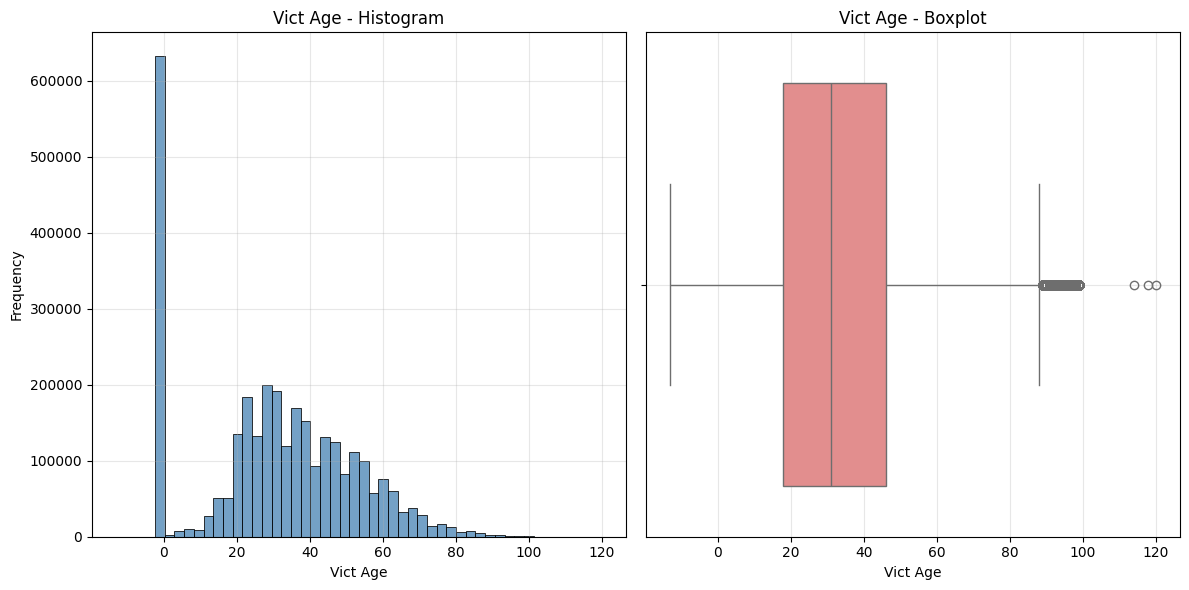

In [42]:
# 🎯 示例1: 查看单个列 - 受害者年龄
plot_column_distribution(datav11, 'Vict Age')

In [43]:
# Vict Age 唯一值数量与各值计数（含占比），按年龄升序展示
col = 'Vict Age'
total = len(datav11)
unique_count = datav11[col].nunique(dropna=True)
print(f"'{col}' 唯一值数量: {unique_count}；总行数: {total}")

vc = datav11[col].value_counts(dropna=False).sort_index()
df_age_counts = pd.DataFrame({
    'Vict Age': vc.index,
    'Count': vc.values,
    'Pct (%)': (vc.values / total * 100).round(4)
})
display(df_age_counts.reset_index(drop=True))

# 另外展示出现最多的前10个年龄
print("\n出现频率最高的 10 个年龄：")
display(datav11[col].value_counts().head(10))


'Vict Age' 唯一值数量: 115；总行数: 3079521


,Vict Age,Count,Pct (%)
0,-13,1,0.0000
1,-12,3,0.0001
2,-11,2,0.0001
3,-10,12,0.0004
4,-9,18,0.0006
...,...,...,...
110,98,186,0.0060
111,99,1143,0.0371
112,114,1,0.0000
113,118,1,0.0000



出现频率最高的 10 个年龄：


Vict Age
0     631658
30     66602
28     66560
29     66422
27     66207
25     66187
26     65892
24     63698
31     63675
23     62156
Name: count, dtype: int64

## 🔧 清洗 Vict Age: 将异常值统一为 0 (Unknown)

### 清洗策略
- **负数年龄** (age < 0): 改为 0 (未知)
- **零值** (age = 0): 保持为 0 (未知)
- **合理年龄** (0 < age < 120): 保持不变
- **超高龄** (age ≥ 120): 可选择保留或改为 0

这样做的好处:
1. ✅ 统一表示"未知年龄"
2. ✅ 消除负数等不合理值
3. ✅ 便于后续分析时过滤未知值

In [44]:
# 📊 清洗前的统计
print("=" * 80)
print("🔍 清洗前 Vict Age 的异常值统计")
print("=" * 80)

total = len(datav11)
age_col = datav11['Vict Age']

# 统计各类异常值
negative_count = (age_col < 0).sum()
zero_count = (age_col == 0).sum()
very_high_count = (age_col >= 120).sum()
abnormal_count = (age_col <= 0).sum() + very_high_count

print(f"\n总记录数: {total:,}")
print(f"\n异常值分布:")
print(f"  • 负数年龄 (age < 0): {negative_count:,} ({negative_count/total*100:.4f}%)")
print(f"  • 零值 (age = 0): {zero_count:,} ({zero_count/total*100:.2f}%)")
print(f"  • 超高龄 (age ≥ 120): {very_high_count:,} ({very_high_count/total*100:.4f}%)")
print(f"  • 合计异常 (age ≤ 0 或 ≥ 120): {abnormal_count:,} ({abnormal_count/total*100:.2f}%)")

# 展示负数年龄的详细分布
if negative_count > 0:
    print(f"\n负数年龄的详细分布:")
    display(age_col[age_col < 0].value_counts().sort_index())

# 展示超高龄的详细分布
if very_high_count > 0:
    print(f"\n超高龄 (≥120) 的详细分布:")
    display(age_col[age_col >= 120].value_counts().sort_index())

print("=" * 80)

🔍 清洗前 Vict Age 的异常值统计

总记录数: 3,079,521

异常值分布:
  • 负数年龄 (age < 0): 778 (0.0253%)
  • 零值 (age = 0): 631,658 (20.51%)
  • 超高龄 (age ≥ 120): 1 (0.0000%)
  • 合计异常 (age ≤ 0 或 ≥ 120): 632,437 (20.54%)

负数年龄的详细分布:


Vict Age
-13      1
-12      3
-11      2
-10     12
-9      18
-8      13
-7      18
-6      25
-5      38
-4      51
-3      79
-2     152
-1     366
Name: count, dtype: int64


超高龄 (≥120) 的详细分布:


Vict Age
120    1
Name: count, dtype: int64

In [45]:
# 🔧 执行清洗: 将 age <= 0 的值改为 0 (表示 Unknown)
# 同时也可以考虑将 age >= 120 的超高龄改为 0

# 创建清洗后的版本
datav12 = datav11.copy()

# 记录清洗前的情况
before_negative = (datav12['Vict Age'] < 0).sum()
before_zero = (datav12['Vict Age'] == 0).sum()
before_very_high = (datav12['Vict Age'] >= 120).sum()

# 方案1: 只处理 age <= 0
# datav12.loc[datav12['Vict Age'] <= 0, 'Vict Age'] = 0

# 方案2: 同时处理 age <= 0 和 age >= 120 (推荐)
datav12.loc[datav12['Vict Age'] <= 0, 'Vict Age'] = 0
datav12.loc[datav12['Vict Age'] >= 120, 'Vict Age'] = 0  # 可选,如果认为120+也不合理

# 清洗后的统计
after_negative = (datav12['Vict Age'] < 0).sum()
after_zero = (datav12['Vict Age'] == 0).sum()
after_very_high = (datav12['Vict Age'] >= 120).sum()

print("=" * 80)
print("✅ Vict Age 清洗完成")
print("=" * 80)
print(f"\n清洗结果对比:")
print(f"  • 负数年龄: {before_negative:,} → {after_negative:,}")
print(f"  • 零值 (Unknown): {before_zero:,} → {after_zero:,}")
print(f"  • 超高龄 (≥120): {before_very_high:,} → {after_very_high:,}")
print(f"\n现在 Vict Age = 0 统一表示 '年龄未知' ({after_zero:,} 条记录, {after_zero/len(datav12)*100:.2f}%)")
print("=" * 80)

✅ Vict Age 清洗完成

清洗结果对比:
  • 负数年龄: 778 → 0
  • 零值 (Unknown): 631,658 → 632,437
  • 超高龄 (≥120): 1 → 0

现在 Vict Age = 0 统一表示 '年龄未知' (632,437 条记录, 20.54%)


📊 Column: Vict Age
   Data type: int64
   Total rows: 3,079,521
   Unique values: 101 (0.00%)
   Missing values: 0 (0.00%)
--------------------------------------------------------------------------------
📈 Detected as: Numeric continuous variable

Descriptive statistics (formatted):


,value
stat,
count,"3,079,521"
mean,30.82
std,21.14
min,0
25%,18
50% (median),31
75%,46
max,118
mode(s),"0 (632,437, 20.54%)"


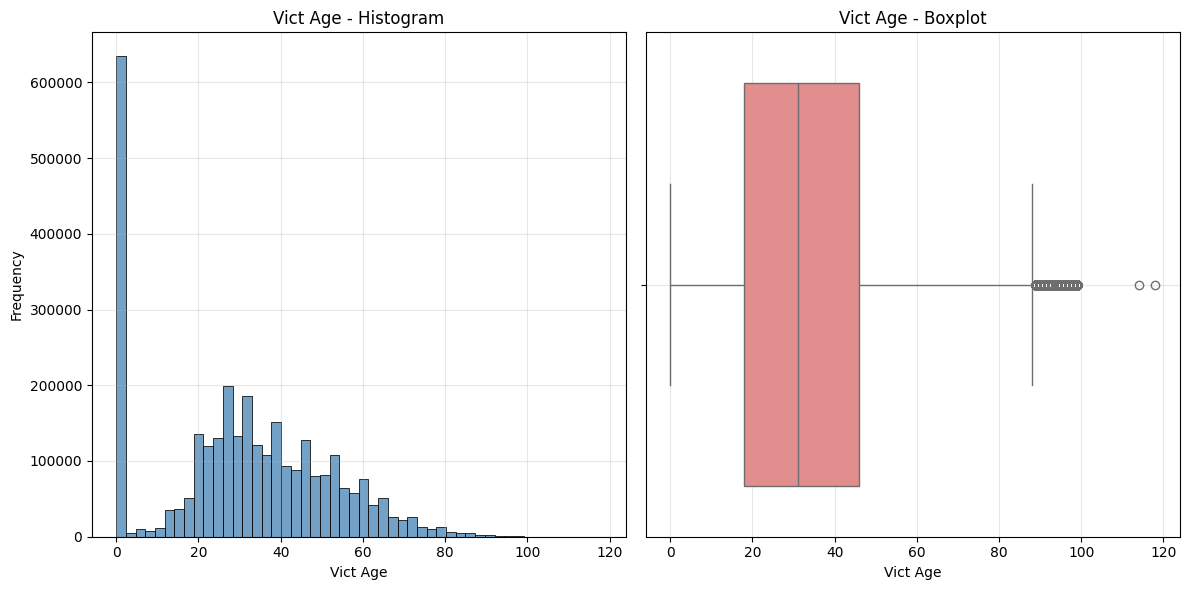

In [46]:
# 📊 清洗后重新查看 Vict Age 分布
plot_column_distribution(datav12, 'Vict Age')

In [47]:
# 📊 清洗后的详细年龄分布表格 (升序)
col = 'Vict Age'
total = len(datav12)
print(f"'{col}' 清洗后统计 (总行数: {total:,})\n")

vc = datav12[col].value_counts(dropna=False).sort_index()
df_age_clean = pd.DataFrame({
    'Vict Age': vc.index,
    'Count': [f"{x:,}" for x in vc.values],
    'Pct (%)': (vc.values / total * 100).round(4)
})
display(df_age_clean.reset_index(drop=True))

# 展示 Top 10 最常见年龄
print("\n清洗后出现频率最高的 10 个年龄:")
top10 = datav12[col].value_counts().head(10)
df_top10 = pd.DataFrame({
    'Vict Age': top10.index,
    'Count': [f"{x:,}" for x in top10.values],
    'Pct (%)': (top10.values / total * 100).round(4)
})
display(df_top10.reset_index(drop=True))

'Vict Age' 清洗后统计 (总行数: 3,079,521)



,Vict Age,Count,Pct (%)
0,0,"632,437",20.5369
1,2,"1,908",0.0620
2,3,"2,345",0.0761
3,4,"2,695",0.0875
4,5,"3,104",0.1008
...,...,...,...
96,97,240,0.0078
97,98,186,0.0060
98,99,"1,143",0.0371
99,114,1,0.0000



清洗后出现频率最高的 10 个年龄:


,Vict Age,Count,Pct (%)
0,0,"632,437",20.5369
1,30,"66,602",2.1627
2,28,"66,560",2.1614
3,29,"66,422",2.1569
4,27,"66,207",2.1499
5,25,"66,187",2.1493
6,26,"65,892",2.1397
7,24,"63,698",2.0684
8,31,"63,675",2.0677
9,23,"62,156",2.0184


In [48]:
# 🎯 对比清洗前后的数据质量
print("=" * 80)
print("📈 Vict Age 清洗前后对比")
print("=" * 80)

comparison = pd.DataFrame({
    '指标': [
        '总记录数',
        '唯一值数量',
        '负数年龄 (< 0)',
        '零值 (= 0)',
        '超高龄 (≥ 120)',
        '合理年龄范围 (1-119)',
        '最小值',
        '最大值',
        '平均值',
        '中位数'
    ],
    '清洗前 (datav11)': [
        f"{len(datav11):,}",
        f"{datav11['Vict Age'].nunique():,}",
        f"{(datav11['Vict Age'] < 0).sum():,}",
        f"{(datav11['Vict Age'] == 0).sum():,}",
        f"{(datav11['Vict Age'] >= 120).sum():,}",
        f"{((datav11['Vict Age'] > 0) & (datav11['Vict Age'] < 120)).sum():,}",
        f"{datav11['Vict Age'].min()}",
        f"{datav11['Vict Age'].max()}",
        f"{datav11['Vict Age'].mean():.2f}",
        f"{datav11['Vict Age'].median():.0f}"
    ],
    '清洗后 (datav12)': [
        f"{len(datav12):,}",
        f"{datav12['Vict Age'].nunique():,}",
        f"{(datav12['Vict Age'] < 0).sum():,}",
        f"{(datav12['Vict Age'] == 0).sum():,}",
        f"{(datav12['Vict Age'] >= 120).sum():,}",
        f"{((datav12['Vict Age'] > 0) & (datav12['Vict Age'] < 120)).sum():,}",
        f"{datav12['Vict Age'].min()}",
        f"{datav12['Vict Age'].max()}",
        f"{datav12['Vict Age'].mean():.2f}",
        f"{datav12['Vict Age'].median():.0f}"
    ]
})

display(comparison)

print("\n✅ 清洗完成!")
print(f"💡 现在 Vict Age = 0 统一表示 '年龄未知'")
print(f"💡 所有负数和超高龄异常值已被处理")
print("=" * 80)

📈 Vict Age 清洗前后对比


,指标,清洗前 (datav11),清洗后 (datav12)
0,总记录数,"3,079,521","3,079,521"
1,唯一值数量,115,101
2,负数年龄 (< 0),778,0
3,零值 (= 0),"631,658","632,437"
4,超高龄 (≥ 120),1,0
5,合理年龄范围 (1-119),"2,447,084","2,447,084"
6,最小值,-13,0
7,最大值,120,118
8,平均值,30.82,30.82
9,中位数,31,31



✅ 清洗完成!
💡 现在 Vict Age = 0 统一表示 '年龄未知'
💡 所有负数和超高龄异常值已被处理


## 💾 保存清洗后的数据

清洗完 Vict Age 后,可以保存为新版本:
- **datav12**: 基于 datav11,将 `Vict Age <= 0` 和 `Vict Age >= 120` 统一设为 0 (Unknown)

```python
# 如果需要保存到 CSV:
# datav12.to_csv('/path/to/Crime_Data_Cleaned_V4_AgeFixed.csv', index=False)
```

In [50]:
#datav12.to_csv('/Users/mannormal/Desktop/课程/y4t1/stat 4011/part2/cleaned_data/Crime_Data_Cleaned_V12_AgeFixed.csv', index=False)

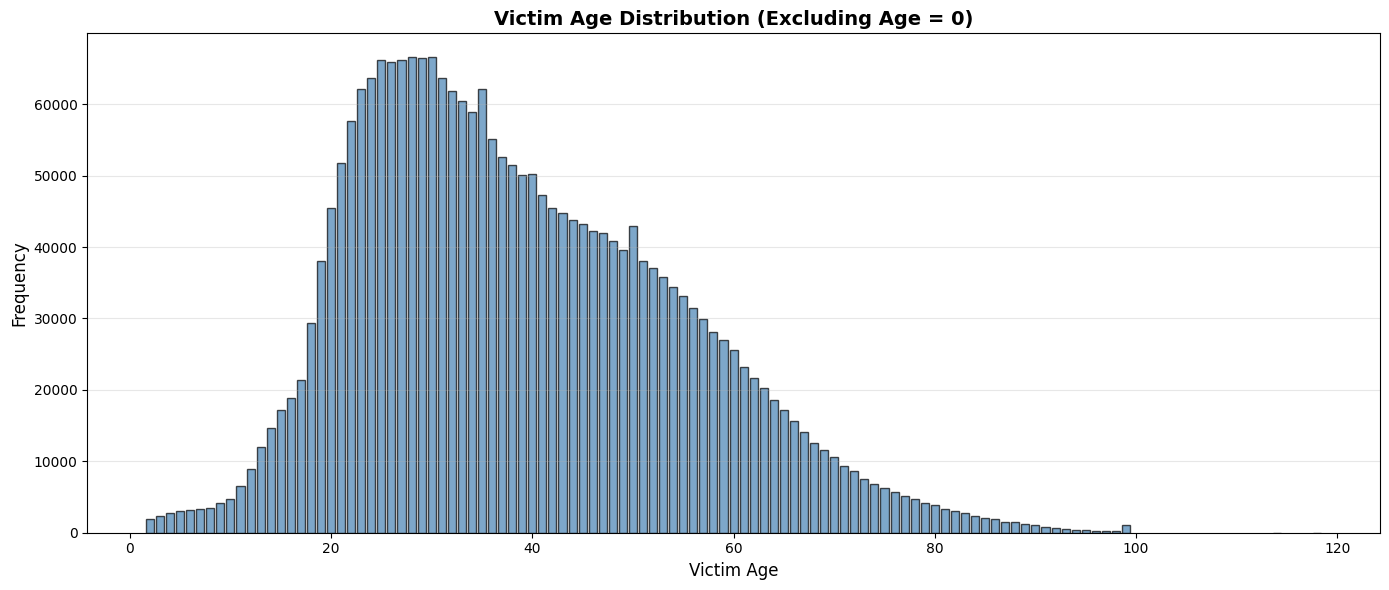

总记录数 (排除 age=0): 2,447,084
年龄范围: 2 - 118
平均年龄: 38.78
中位数: 36


In [52]:
import matplotlib.pyplot as plt

# 过滤掉 age = 0 的数据
age_filtered = datav12[datav12['Vict Age'] > 0]['Vict Age']

# 统计频数
age_counts = age_filtered.value_counts().sort_index()

# 画图
plt.figure(figsize=(14, 6))
plt.bar(age_counts.index, age_counts.values, color='steelblue', edgecolor='black', alpha=0.7)
plt.xlabel('Victim Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Victim Age Distribution (Excluding Age = 0)', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 打印统计信息
print(f"总记录数 (排除 age=0): {len(age_filtered):,}")
print(f"年龄范围: {age_filtered.min()} - {age_filtered.max()}")
print(f"平均年龄: {age_filtered.mean():.2f}")
print(f"中位数: {age_filtered.median():.0f}")

📊 Column: Crm Cd Desc
   Data type: object
   Total rows: 3,079,521
   Unique values: 143 (0.00%)
   Missing values: 0 (0.00%)
--------------------------------------------------------------------------------
📊 Detected as: High cardinality categorical variable (unique values > 20)

Top 20 values distribution (out of 143 unique values):


,Value,Count,Percentage (%)
0,VEHICLE - STOLEN,"271,667",8.82
1,BATTERY - SIMPLE ASSAULT,"261,890",8.50
2,BURGLARY FROM VEHICLE,"222,895",7.24
3,BURGLARY,"202,205",6.57
4,THEFT PLAIN - PETTY ($950 & UNDER),"200,672",6.52
5,THEFT OF IDENTITY,"187,849",6.10
6,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...","168,233",5.46
7,INTIMATE PARTNER - SIMPLE ASSAULT,"158,201",5.14
8,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT","144,373",4.69
9,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),"127,826",4.15



Mode information:


,Value,Count,Percentage (%)
0,VEHICLE - STOLEN,"271,667",8.82


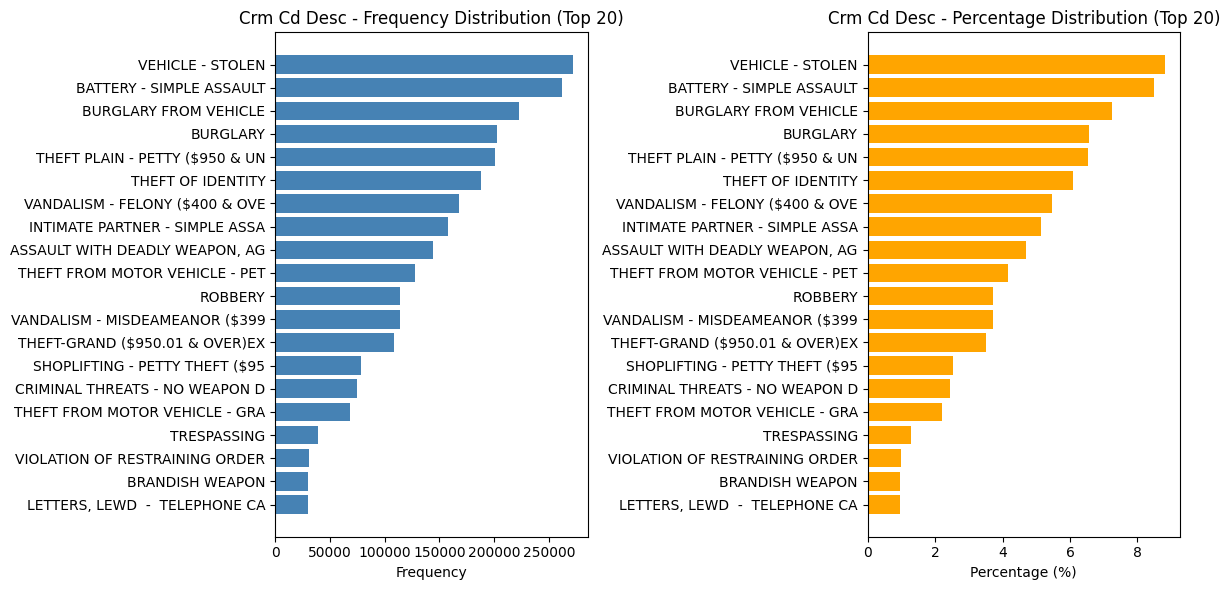

In [51]:
# 🎯 示例2: 查看分类变量 - 犯罪类型描述
plot_column_distribution(datav11, 'Crm Cd Desc', max_categories=20)

🔧 步骤 0: 转换日期格式

当前日期字段类型:
  • Date Rptd: object
  • DATE OCC: object

正在转换日期格式...


/var/folders/t_/_rls_mdn6j71jv6pjl69n5680000gn/T/ipykernel_93065/162734765.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datav13['Date Rptd'] = pd.to_datetime(datav13['Date Rptd'], errors='coerce')
/var/folders/t_/_rls_mdn6j71jv6pjl69n5680000gn/T/ipykernel_93065/162734765.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datav13['DATE OCC'] = pd.to_datetime(datav13['DATE OCC'], errors='coerce')



转换后的日期字段类型:
  • Date Rptd: datetime64[ns]
  • DATE OCC: datetime64[ns]

转换后的缺失值:
  • Date Rptd NaN: 0 (0.0000%)
  • DATE OCC NaN: 0 (0.0000%)

🔍 步骤 1: 分析报案时间与案发时间的时间差

📈 报案延迟天数统计 (总记录: 3,079,521)
  • 最小值: 0 天
  • 最大值: 5407 天
  • 平均值: 21.06 天
  • 中位数: 1 天
  • 标准差: 156.57 天

📊 报案延迟分布:
  • 当天报案 (0天): 1,457,584 (47.33%)
  • 1天内: 733,972 (23.83%)
  • 2-7天: 475,621 (15.44%)
  • 8-30天: 210,090 (6.82%)
  • 31-365天: 163,494 (5.31%)
  • 超过1年: 38,760 (1.26%)
  • 负数延迟 (异常): 0 (0.00%)


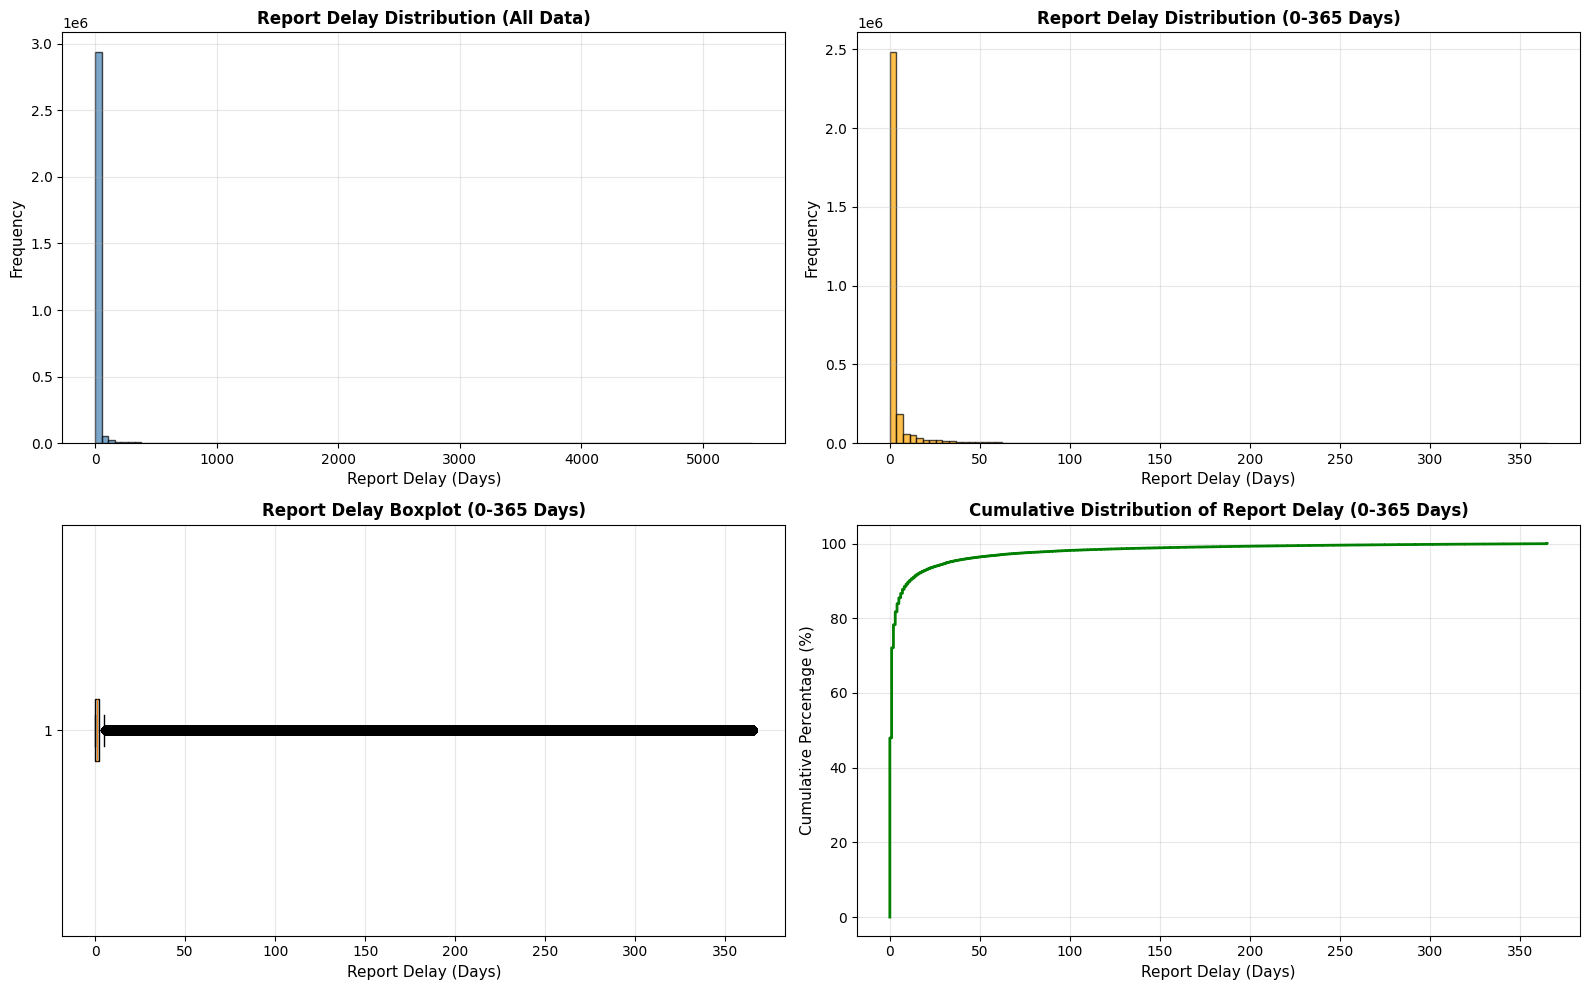


⚠️ 异常值检查:
  • ✅ 没有负数延迟

  • 极端延迟 (超过10年): 935 (0.0304%)
    - 最大值: 5407 天 (14.8 年)
    - 示例前10个:


,DR_NO,Date Rptd,DATE OCC,Report_Delay_Days,Crm Cd Desc
52545,241011858,2024-10-21,2010-01-01,5407,"RAPE, FORCIBLE"
205426,241513900,2024-09-18,2010-01-01,5374,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI..."
52542,251904082,2025-02-01,2010-06-01,5359,BATTERY WITH SEXUAL CONTACT
52516,251904074,2025-01-29,2010-06-01,5356,BATTERY WITH SEXUAL CONTACT
90309,241913873,2024-12-26,2010-06-01,5322,ORAL COPULATION
85459,241214163,2024-07-25,2010-02-05,5284,THEFT OF IDENTITY
52541,241310404,2024-06-13,2010-01-01,5277,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...
182675,240609851,2024-06-11,2010-01-01,5275,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...
157969,240313224,2024-08-15,2010-04-09,5242,THEFT OF IDENTITY
129117,241008334,2024-04-30,2010-01-17,5217,THEFT OF IDENTITY



✅ 报案延迟分析完成!
💡 建议: 考虑是否需要处理负数延迟(数据录入错误)或极端延迟值


In [55]:
# ============================================================================
# 📅 时间字段分析与特征工程
# ============================================================================

import matplotlib.pyplot as plt
import seaborn as sns

print("=" * 80)
print("🔧 步骤 0: 转换日期格式")
print("=" * 80)

datav13 = datav12.copy()

# 0️⃣ 首先检查日期字段的类型
print(f"\n当前日期字段类型:")
print(f"  • Date Rptd: {datav13['Date Rptd'].dtype}")
print(f"  • DATE OCC: {datav13['DATE OCC'].dtype}")

# 转换为 datetime 类型
print(f"\n正在转换日期格式...")
datav13['Date Rptd'] = pd.to_datetime(datav13['Date Rptd'], errors='coerce')
datav13['DATE OCC'] = pd.to_datetime(datav13['DATE OCC'], errors='coerce')

# 检查转换后的类型和缺失值
print(f"\n转换后的日期字段类型:")
print(f"  • Date Rptd: {datav13['Date Rptd'].dtype}")
print(f"  • DATE OCC: {datav13['DATE OCC'].dtype}")

na_rptd = datav13['Date Rptd'].isna().sum()
na_occ = datav13['DATE OCC'].isna().sum()
total = len(datav13)

print(f"\n转换后的缺失值:")
print(f"  • Date Rptd NaN: {na_rptd:,} ({na_rptd/total*100:.4f}%)")
print(f"  • DATE OCC NaN: {na_occ:,} ({na_occ/total*100:.4f}%)")

if na_rptd > 0 or na_occ > 0:
    print(f"\n⚠️ 警告: 存在无法转换的日期,已标记为 NaT")

print("=" * 80)

# ============================================================================
print("\n" + "=" * 80)
print("🔍 步骤 1: 分析报案时间与案发时间的时间差")
print("=" * 80)

# 1️⃣ 计算时间差 (天数)
datav13['Report_Delay_Days'] = (datav13['Date Rptd'] - datav13['DATE OCC']).dt.days

# 2️⃣ 基础统计
delay = datav13['Report_Delay_Days']

print(f"\n📈 报案延迟天数统计 (总记录: {total:,})")
print(f"  • 最小值: {delay.min()} 天")
print(f"  • 最大值: {delay.max()} 天")
print(f"  • 平均值: {delay.mean():.2f} 天")
print(f"  • 中位数: {delay.median():.0f} 天")
print(f"  • 标准差: {delay.std():.2f} 天")

# 3️⃣ 分组统计
print(f"\n📊 报案延迟分布:")
delay_groups = {
    '当天报案 (0天)': (delay == 0).sum(),
    '1天内': ((delay > 0) & (delay <= 1)).sum(),
    '2-7天': ((delay > 1) & (delay <= 7)).sum(),
    '8-30天': ((delay > 7) & (delay <= 30)).sum(),
    '31-365天': ((delay > 30) & (delay <= 365)).sum(),
    '超过1年': (delay > 365).sum(),
    '负数延迟 (异常)': (delay < 0).sum()
}

for group_name, count in delay_groups.items():
    pct = count / total * 100
    print(f"  • {group_name}: {count:,} ({pct:.2f}%)")

# 4️⃣ 可视化
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 左上: 直方图 (全部数据)
axes[0, 0].hist(delay.dropna(), bins=100, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Report Delay (Days)', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].set_title('Report Delay Distribution (All Data)', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 右上: 直方图 (限制范围: 0-365天)
delay_filtered = delay[(delay >= 0) & (delay <= 365)]
axes[0, 1].hist(delay_filtered, bins=100, color='orange', edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Report Delay (Days)', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
axes[0, 1].set_title('Report Delay Distribution (0-365 Days)', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 左下: 箱线图
bp = axes[1, 0].boxplot(delay_filtered, vert=False, patch_artist=True)
bp['boxes'][0].set_facecolor('lightblue')
axes[1, 0].set_xlabel('Report Delay (Days)', fontsize=11)
axes[1, 0].set_title('Report Delay Boxplot (0-365 Days)', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 右下: 累积分布
delay_sorted = delay_filtered.sort_values()
cumulative_pct = np.arange(1, len(delay_sorted) + 1) / len(delay_sorted) * 100
axes[1, 1].plot(delay_sorted, cumulative_pct, color='green', linewidth=2)
axes[1, 1].set_xlabel('Report Delay (Days)', fontsize=11)
axes[1, 1].set_ylabel('Cumulative Percentage (%)', fontsize=11)
axes[1, 1].set_title('Cumulative Distribution of Report Delay (0-365 Days)', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 5️⃣ 检查异常值
print(f"\n⚠️ 异常值检查:")

# 负数延迟检查
negative_delay = delay[delay < 0]
if len(negative_delay) > 0:
    print(f"  • 负数延迟 (报案日期早于案发日期): {len(negative_delay):,} ({len(negative_delay)/total*100:.4f}%)")
    print(f"    - 最小值: {negative_delay.min()} 天")
    print(f"    - 示例前10个:")
    example_indices = negative_delay.nsmallest(10).index
    display(datav13.loc[example_indices, ['DR_NO', 'Date Rptd', 'DATE OCC', 'Report_Delay_Days']])
else:
    print(f"  • ✅ 没有负数延迟")

# 极端延迟检查
extreme_delay = delay[delay > 3650]  # 超过10年
if len(extreme_delay) > 0:
    print(f"\n  • 极端延迟 (超过10年): {len(extreme_delay):,} ({len(extreme_delay)/total*100:.4f}%)")
    print(f"    - 最大值: {extreme_delay.max()} 天 ({extreme_delay.max()/365:.1f} 年)")
    print(f"    - 示例前10个:")
    example_indices = extreme_delay.nlargest(10).index
    display(datav13.loc[example_indices, ['DR_NO', 'Date Rptd', 'DATE OCC', 'Report_Delay_Days', 'Crm Cd Desc']])
else:
    print(f"  • ✅ 没有超过10年的极端延迟")

print("\n" + "=" * 80)
print("✅ 报案延迟分析完成!")
print("💡 建议: 考虑是否需要处理负数延迟(数据录入错误)或极端延迟值")
print("=" * 80)

In [56]:
# ============================================================================
# 🎯 步骤 2: 提取时间特征 (年、月、日、星期、小时、分钟、季度)
# ============================================================================

print("\n" + "=" * 80)
print("🎯 提取时间特征...")
print("=" * 80)

# 1️⃣ 从 DATE OCC (案发日期) 提取特征
datav13['Year'] = datav13['DATE OCC'].dt.year
datav13['Month'] = datav13['DATE OCC'].dt.month
datav13['Day'] = datav13['DATE OCC'].dt.day
datav13['DayOfWeek'] = datav13['DATE OCC'].dt.dayofweek  # 0=Monday, 6=Sunday
datav13['DayOfWeek_Name'] = datav13['DATE OCC'].dt.day_name()
datav13['WeekOfYear'] = datav13['DATE OCC'].dt.isocalendar().week
datav13['Quarter'] = datav13['DATE OCC'].dt.quarter

# 2️⃣ 从 TIME OCC (案发时间) 提取特征
# TIME OCC 格式: 军事时间 (如 1430 = 14:30, 845 = 08:45, 0 = 00:00)
datav13['Hour'] = datav13['TIME OCC'] // 100           # 提取小时
datav13['Minute'] = datav13['TIME OCC'] % 100          # 提取分钟

# 3️⃣ 创建时间段分类 (可选,便于后续分析)
def categorize_time(hour):
    """将小时转换为时间段"""
    if 0 <= hour < 6:
        return 'Late Night (00:00-05:59)'
    elif 6 <= hour < 12:
        return 'Morning (06:00-11:59)'
    elif 12 <= hour < 18:
        return 'Afternoon (12:00-17:59)'
    else:
        return 'Evening (18:00-23:59)'

datav13['Time_Period'] = datav13['Hour'].apply(categorize_time)

# 4️⃣ 检查新特征
print(f"\n✅ 新增时间特征:")
print(f"\n📅 日期特征:")
print(f"  • Year (年份):          {datav13['Year'].min()} - {datav13['Year'].max()}")
print(f"  • Month (月份):         1 - 12")
print(f"  • Day (日期):           1 - 31")
print(f"  • Quarter (季度):       1 - 4")
print(f"  • WeekOfYear (周数):    1 - 53")

print(f"\n📆 星期特征:")
print(f"  • DayOfWeek (数字):     0 (Monday) - 6 (Sunday)")
print(f"  • DayOfWeek_Name:       Monday, Tuesday, ..., Sunday")

print(f"\n⏰ 时间特征:")
print(f"  • Hour (小时):          {datav13['Hour'].min()} - {datav13['Hour'].max()}")
print(f"  • Minute (分钟):        {datav13['Minute'].min()} - {datav13['Minute'].max()}")
print(f"  • Time_Period (时间段): Late Night / Morning / Afternoon / Evening")

print(f"\n⏱️ 延迟特征:")
print(f"  • Report_Delay_Days:    {datav13['Report_Delay_Days'].min()} - {datav13['Report_Delay_Days'].max()} 天")

# 5️⃣ 显示示例数据
print(f"\n📋 示例数据 (前5行):")
display(datav13[['DATE OCC', 'TIME OCC', 'Year', 'Month', 'Day', 'DayOfWeek', 
                  'DayOfWeek_Name', 'Hour', 'Minute', 'Time_Period', 'Report_Delay_Days']].head())

print("\n" + "=" * 80)
print("✅ 时间特征提取完成!")
print("💾 数据集现在包含 {} 列".format(len(datav13.columns)))
print("=" * 80)


🎯 提取时间特征...

✅ 新增时间特征:

📅 日期特征:
  • Year (年份):          2010 - 2025
  • Month (月份):         1 - 12
  • Day (日期):           1 - 31
  • Quarter (季度):       1 - 4
  • WeekOfYear (周数):    1 - 53

📆 星期特征:
  • DayOfWeek (数字):     0 (Monday) - 6 (Sunday)
  • DayOfWeek_Name:       Monday, Tuesday, ..., Sunday

⏰ 时间特征:
  • Hour (小时):          0 - 23
  • Minute (分钟):        0 - 59
  • Time_Period (时间段): Late Night / Morning / Afternoon / Evening

⏱️ 延迟特征:
  • Report_Delay_Days:    0 - 5407 天

📋 示例数据 (前5行):


,DATE OCC,TIME OCC,Year,Month,Day,DayOfWeek,DayOfWeek_Name,Hour,Minute,Time_Period,Report_Delay_Days
0,2010-02-20,1350,2010,2,20,5,Saturday,13,50,Afternoon (12:00-17:59),0
1,2010-09-12,45,2010,9,12,6,Sunday,0,45,Late Night (00:00-05:59),1
2,2010-08-09,1515,2010,8,9,0,Monday,15,15,Afternoon (12:00-17:59),0
3,2010-01-05,150,2010,1,5,1,Tuesday,1,50,Late Night (00:00-05:59),0
4,2010-01-02,2100,2010,1,2,5,Saturday,21,0,Evening (18:00-23:59),1



✅ 时间特征提取完成!
💾 数据集现在包含 38 列


In [57]:
# ============================================================================
# 📊 步骤 3: 验证时间特征的质量
# ============================================================================

print("\n" + "=" * 80)
print("🔍 验证时间特征质量...")
print("=" * 80)

# 检查异常值
print(f"\n⚠️ 时间特征异常值检查:")

# Hour 检查 (应该在 0-23 范围内)
invalid_hours = datav13[(datav13['Hour'] < 0) | (datav13['Hour'] > 23)]
if len(invalid_hours) > 0:
    print(f"  • ❌ Hour 异常值: {len(invalid_hours):,} ({len(invalid_hours)/total*100:.4f}%)")
    print(f"    - 范围: {invalid_hours['Hour'].min()} - {invalid_hours['Hour'].max()}")
else:
    print(f"  • ✅ Hour 正常 (0-23)")

# Minute 检查 (应该在 0-59 范围内)
invalid_minutes = datav13[(datav13['Minute'] < 0) | (datav13['Minute'] > 59)]
if len(invalid_minutes) > 0:
    print(f"  • ❌ Minute 异常值: {len(invalid_minutes):,} ({len(invalid_minutes)/total*100:.4f}%)")
    print(f"    - 范围: {invalid_minutes['Minute'].min()} - {invalid_minutes['Minute'].max()}")
    print(f"    - 示例异常 TIME OCC:")
    display(invalid_minutes[['TIME OCC', 'Hour', 'Minute']].value_counts().head(10))
else:
    print(f"  • ✅ Minute 正常 (0-59)")

# Month 检查
print(f"\n  • Month 分布: {datav13['Month'].min()} - {datav13['Month'].max()}")

# Year 检查
print(f"  • Year 分布: {datav13['Year'].min()} - {datav13['Year'].max()}")

# 统计各时间段的案件数量
print(f"\n📊 时间段分布:")
time_period_counts = datav13['Time_Period'].value_counts().sort_index()
for period, count in time_period_counts.items():
    pct = count / total * 100
    print(f"  • {period}: {count:,} ({pct:.2f}%)")

print("\n" + "=" * 80)
print("✅ 时间特征质量验证完成!")
print("=" * 80)


🔍 验证时间特征质量...

⚠️ 时间特征异常值检查:
  • ✅ Hour 正常 (0-23)
  • ✅ Minute 正常 (0-59)

  • Month 分布: 1 - 12
  • Year 分布: 2010 - 2025

📊 时间段分布:
  • Afternoon (12:00-17:59): 1,013,001 (32.89%)
  • Evening (18:00-23:59): 987,161 (32.06%)
  • Late Night (00:00-05:59): 442,368 (14.36%)
  • Morning (06:00-11:59): 636,991 (20.68%)

✅ 时间特征质量验证完成!


In [58]:
datav13

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,LOCATION,Cross Street,LAT,LON,_source,Report_Delay_Days,Year,Month,Day,DayOfWeek,DayOfWeek_Name,WeekOfYear,Quarter,Hour,Minute,Time_Period
0,1307355,2010-02-20,2010-02-20,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,0913 1814 2000,48,M,H,501.0,SINGLE FAMILY DWELLING,0.0,None,AA,Adult Arrest,900.0,0.0,300 E GAGE AV,Unknown,33.9825,-118.2695,df1,0,2010,2,20,5,Saturday,7,1,13,50,Afternoon (12:00-17:59)
1,11401303,2010-09-13,2010-09-12,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,0,M,W,101.0,STREET,0.0,None,IC,Invest Cont,740.0,0.0,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962,df1,1,2010,9,12,6,Sunday,36,3,0,45,Late Night (00:00-05:59)
2,70309629,2010-08-09,2010-08-09,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,0344,0,M,H,103.0,ALLEY,0.0,None,IC,Invest Cont,946.0,0.0,1300 E 21ST ST,Unknown,34.0224,-118.2524,df1,0,2010,8,9,0,Monday,32,3,15,15,Afternoon (12:00-17:59)
3,90631215,2010-01-05,2010-01-05,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,1100 0400 1402,47,F,W,101.0,STREET,102.0,HAND GUN,IC,Invest Cont,900.0,998.0,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295,df1,0,2010,1,5,1,Tuesday,1,1,1,50,Late Night (00:00-05:59)
4,100100501,2010-01-03,2010-01-02,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",0400,47,F,H,103.0,ALLEY,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,122.0,0.0,8TH ST,SAN PEDRO ST,34.0387,-118.2488,df1,1,2010,1,2,5,Saturday,53,1,21,0,Evening (18:00-23:59)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3080314,252104112,2025-02-02,2025-02-02,130,21,Topanga,2103,2,946,OTHER MISCELLANEOUS CRIME,0000,35,M,X,101.0,STREET,0.0,None,IC,Invest Cont,946.0,0.0,22100 ROSCOE BL,Unknown,34.2259,-118.6126,df2,0,2025,2,2,6,Sunday,5,1,1,30,Late Night (00:00-05:59)
3080315,250404100,2025-02-18,2025-02-18,1000,4,Hollenbeck,479,2,237,CHILD NEGLECT (SEE 300 W.I.C.),1258 0553 0602,11,M,B,501.0,SINGLE FAMILY DWELLING,0.0,None,IC,Invest Cont,237.0,0.0,3500 PERCY ST,Unknown,34.0277,-118.1979,df2,0,2025,2,18,1,Tuesday,8,1,10,0,Morning (06:00-11:59)
3080316,251304095,2025-01-31,2025-01-30,1554,13,Newton,1372,2,850,INDECENT EXPOSURE,0000,16,F,H,101.0,STREET,0.0,None,IC,Invest Cont,850.0,0.0,300 E 53RD ST,Unknown,33.9942,-118.2701,df2,1,2025,1,30,3,Thursday,5,1,15,54,Afternoon (12:00-17:59)
3080317,251704066,2025-01-17,2025-01-17,1600,17,Devonshire,1774,2,624,BATTERY - SIMPLE ASSAULT,0400 1259 1822 0356,17,M,H,721.0,HIGH SCHOOL,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,624.0,0.0,9600 ZELZAH AV,Unknown,34.2450,-118.5233,df2,0,2025,1,17,4,Friday,3,1,16,0,Afternoon (12:00-17:59)


In [59]:
# ============================================================================
# 🗑️ 删除冗余的时间特征
# ============================================================================

print("=" * 80)
print("🗑️ 删除冗余的时间衍生特征...")
print("=" * 80)

# 记录删除前的列数
before_cols = len(datav13.columns)
print(f"\n删除前列数: {before_cols}")

# 定义要删除的列
cols_to_drop = ['Time_Period', 'Quarter', 'WeekOfYear', 'DayOfWeek_Name']

# 检查这些列是否存在
existing_cols = [col for col in cols_to_drop if col in datav13.columns]
missing_cols = [col for col in cols_to_drop if col not in datav13.columns]

if existing_cols:
    print(f"\n准备删除的列: {existing_cols}")
    datav13 = datav13.drop(columns=existing_cols)
    print(f"✅ 已删除 {len(existing_cols)} 列")
else:
    print(f"\n⚠️ 没有找到需要删除的列")

if missing_cols:
    print(f"⚠️ 以下列不存在,已跳过: {missing_cols}")

# 记录删除后的列数
after_cols = len(datav13.columns)
print(f"\n删除后列数: {after_cols}")
print(f"共减少: {before_cols - after_cols} 列")

# 显示保留的时间特征
print(f"\n✅ 保留的时间特征:")
time_features = ['Year', 'Month', 'Day', 'DayOfWeek', 'Hour', 'Minute', 'Report_Delay_Days']
existing_time_features = [col for col in time_features if col in datav13.columns]
for feature in existing_time_features:
    print(f"  • {feature}")

print("\n" + "=" * 80)
print("✅ 清理完成!")
print(f"💾 当前数据集: {len(datav13):,} 行 × {len(datav13.columns)} 列")
print("=" * 80)

🗑️ 删除冗余的时间衍生特征...

删除前列数: 38

准备删除的列: ['Time_Period', 'Quarter', 'WeekOfYear', 'DayOfWeek_Name']
✅ 已删除 4 列

删除后列数: 34
共减少: 4 列

✅ 保留的时间特征:
  • Year
  • Month
  • Day
  • DayOfWeek
  • Hour
  • Minute
  • Report_Delay_Days

✅ 清理完成!
💾 当前数据集: 3,079,521 行 × 34 列


In [60]:
# 📋 验证删除结果 - 显示当前所有列名
print("\n当前 datav13 的所有列名:")
print("=" * 80)
for i, col in enumerate(datav13.columns, 1):
    print(f"{i:2d}. {col}")
print("=" * 80)
print(f"总计: {len(datav13.columns)} 列")


当前 datav13 的所有列名:
 1. DR_NO
 2. Date Rptd
 3. DATE OCC
 4. TIME OCC
 5. AREA
 6. AREA NAME
 7. Rpt Dist No
 8. Part 1-2
 9. Crm Cd
10. Crm Cd Desc
11. Mocodes
12. Vict Age
13. Vict Sex
14. Vict Descent
15. Premis Cd
16. Premis Desc
17. Weapon Used Cd
18. Weapon Desc
19. Status
20. Status Desc
21. Crm Cd 1
22. Crm Cd 2
23. LOCATION
24. Cross Street
25. LAT
26. LON
27. _source
28. Report_Delay_Days
29. Year
30. Month
31. Day
32. DayOfWeek
33. Hour
34. Minute
总计: 34 列


📊 生成每日犯罪数量折线图...

📊 统计信息:
  • 时间跨度: 2010-01-01 至 2025-05-29
  • 总天数: 5,531 天
  • 总犯罪数: 3,079,521
  • 日均犯罪: 556.77
  • 最高单日: 2,354 (日期: 2010-01-01)
  • 最低单日: 1 (日期: 2025-01-07)


/var/folders/t_/_rls_mdn6j71jv6pjl69n5680000gn/T/ipykernel_93065/3288682616.py:67: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/t_/_rls_mdn6j71jv6pjl69n5680000gn/T/ipykernel_93065/3288682616.py:67: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/t_/_rls_mdn6j71jv6pjl69n5680000gn/T/ipykernel_93065/3288682616.py:67: UserWarning: Glyph 29359 (\N{CJK UNIFIED IDEOGRAPH-72AF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/t_/_rls_mdn6j71jv6pjl69n5680000gn/T/ipykernel_93065/3288682616.py:67: UserWarning: Glyph 32618 (\N{CJK UNIFIED IDEOGRAPH-7F6A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/t_/_rls_mdn6j71jv6pjl69n5680000gn/T/ipykernel_93065/3288682616.py:67: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/homebrew/Caskro

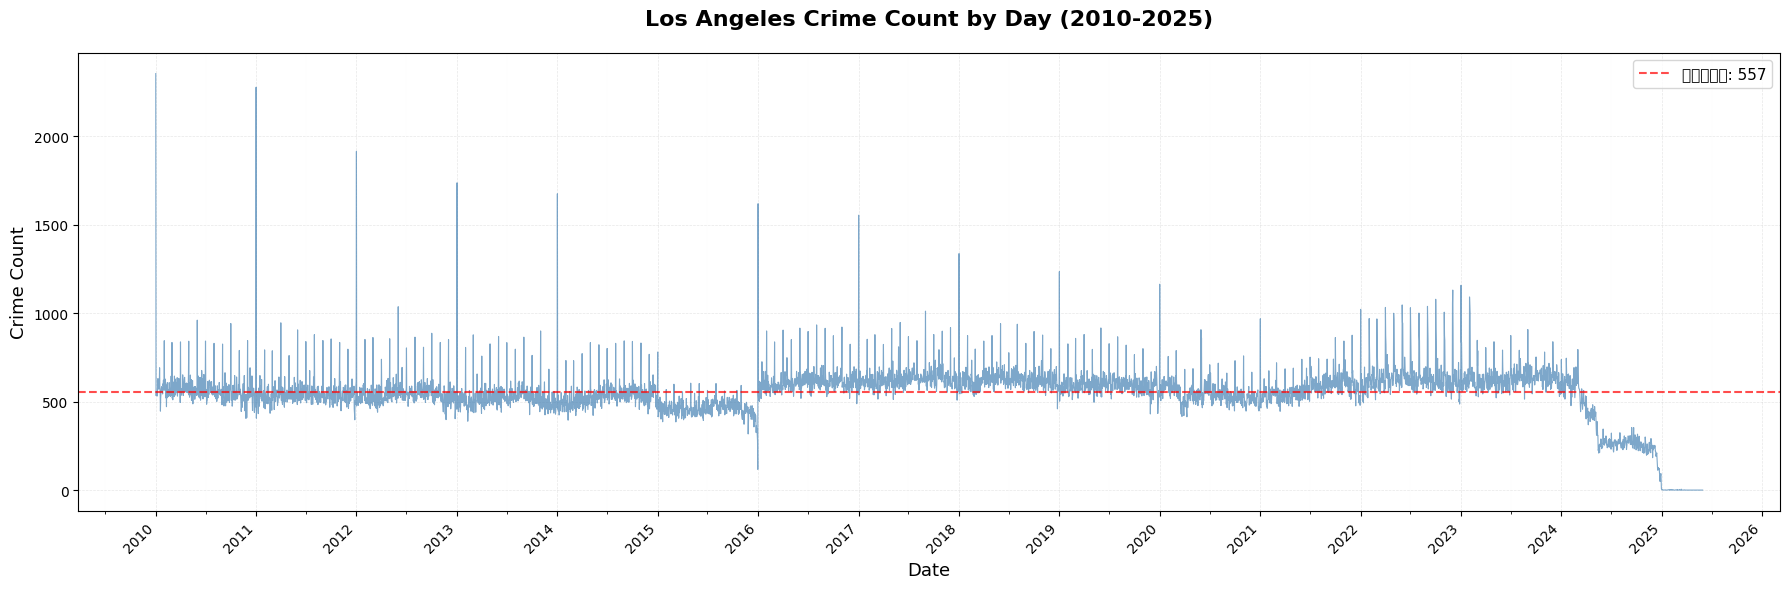


✅ 折线图生成完成!


In [61]:
# ============================================================================
# 📈 每日犯罪数量时间序列分析
# ============================================================================

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

print("=" * 80)
print("📊 生成每日犯罪数量折线图...")
print("=" * 80)

# 1️⃣ 按日期统计犯罪数量
daily_crimes = datav13.groupby('DATE OCC').size().reset_index(name='Crime_Count')

# 2️⃣ 确保日期已排序
daily_crimes = daily_crimes.sort_values('DATE OCC')

# 3️⃣ 基础统计
total_days = len(daily_crimes)
total_crimes = daily_crimes['Crime_Count'].sum()
avg_daily = daily_crimes['Crime_Count'].mean()
max_daily = daily_crimes['Crime_Count'].max()
min_daily = daily_crimes['Crime_Count'].min()

print(f"\n📊 统计信息:")
print(f"  • 时间跨度: {daily_crimes['DATE OCC'].min().date()} 至 {daily_crimes['DATE OCC'].max().date()}")
print(f"  • 总天数: {total_days:,} 天")
print(f"  • 总犯罪数: {total_crimes:,}")
print(f"  • 日均犯罪: {avg_daily:.2f}")
print(f"  • 最高单日: {max_daily:,} (日期: {daily_crimes.loc[daily_crimes['Crime_Count'].idxmax(), 'DATE OCC'].date()})")
print(f"  • 最低单日: {min_daily:,} (日期: {daily_crimes.loc[daily_crimes['Crime_Count'].idxmin(), 'DATE OCC'].date()})")

# 4️⃣ 创建折线图
fig, ax = plt.subplots(figsize=(18, 6))

# 绘制折线
ax.plot(daily_crimes['DATE OCC'], daily_crimes['Crime_Count'], 
        color='steelblue', linewidth=0.8, alpha=0.7)

# 添加平均线
ax.axhline(y=avg_daily, color='red', linestyle='--', linewidth=1.5, 
          label=f'日均犯罪数: {avg_daily:.0f}', alpha=0.7)

# 设置标题和标签
ax.set_title('Los Angeles Crime Count by Day (2010-2025)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Date', fontsize=13)
ax.set_ylabel('Crime Count', fontsize=13)

# 格式化 x 轴日期
ax.xaxis.set_major_locator(mdates.YearLocator())  # 每年一个主刻度
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # 显示年份
ax.xaxis.set_minor_locator(mdates.MonthLocator((1, 7)))  # 每半年一个次刻度

# 旋转 x 轴标签
plt.xticks(rotation=45, ha='right')

# 添加网格
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
ax.grid(True, which='minor', alpha=0.15, linestyle=':', linewidth=0.3)

# 添加图例
ax.legend(loc='upper right', fontsize=11)

# 优化布局
plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("✅ 折线图生成完成!")
print("=" * 80)


📊 生成多粒度时间序列对比图...


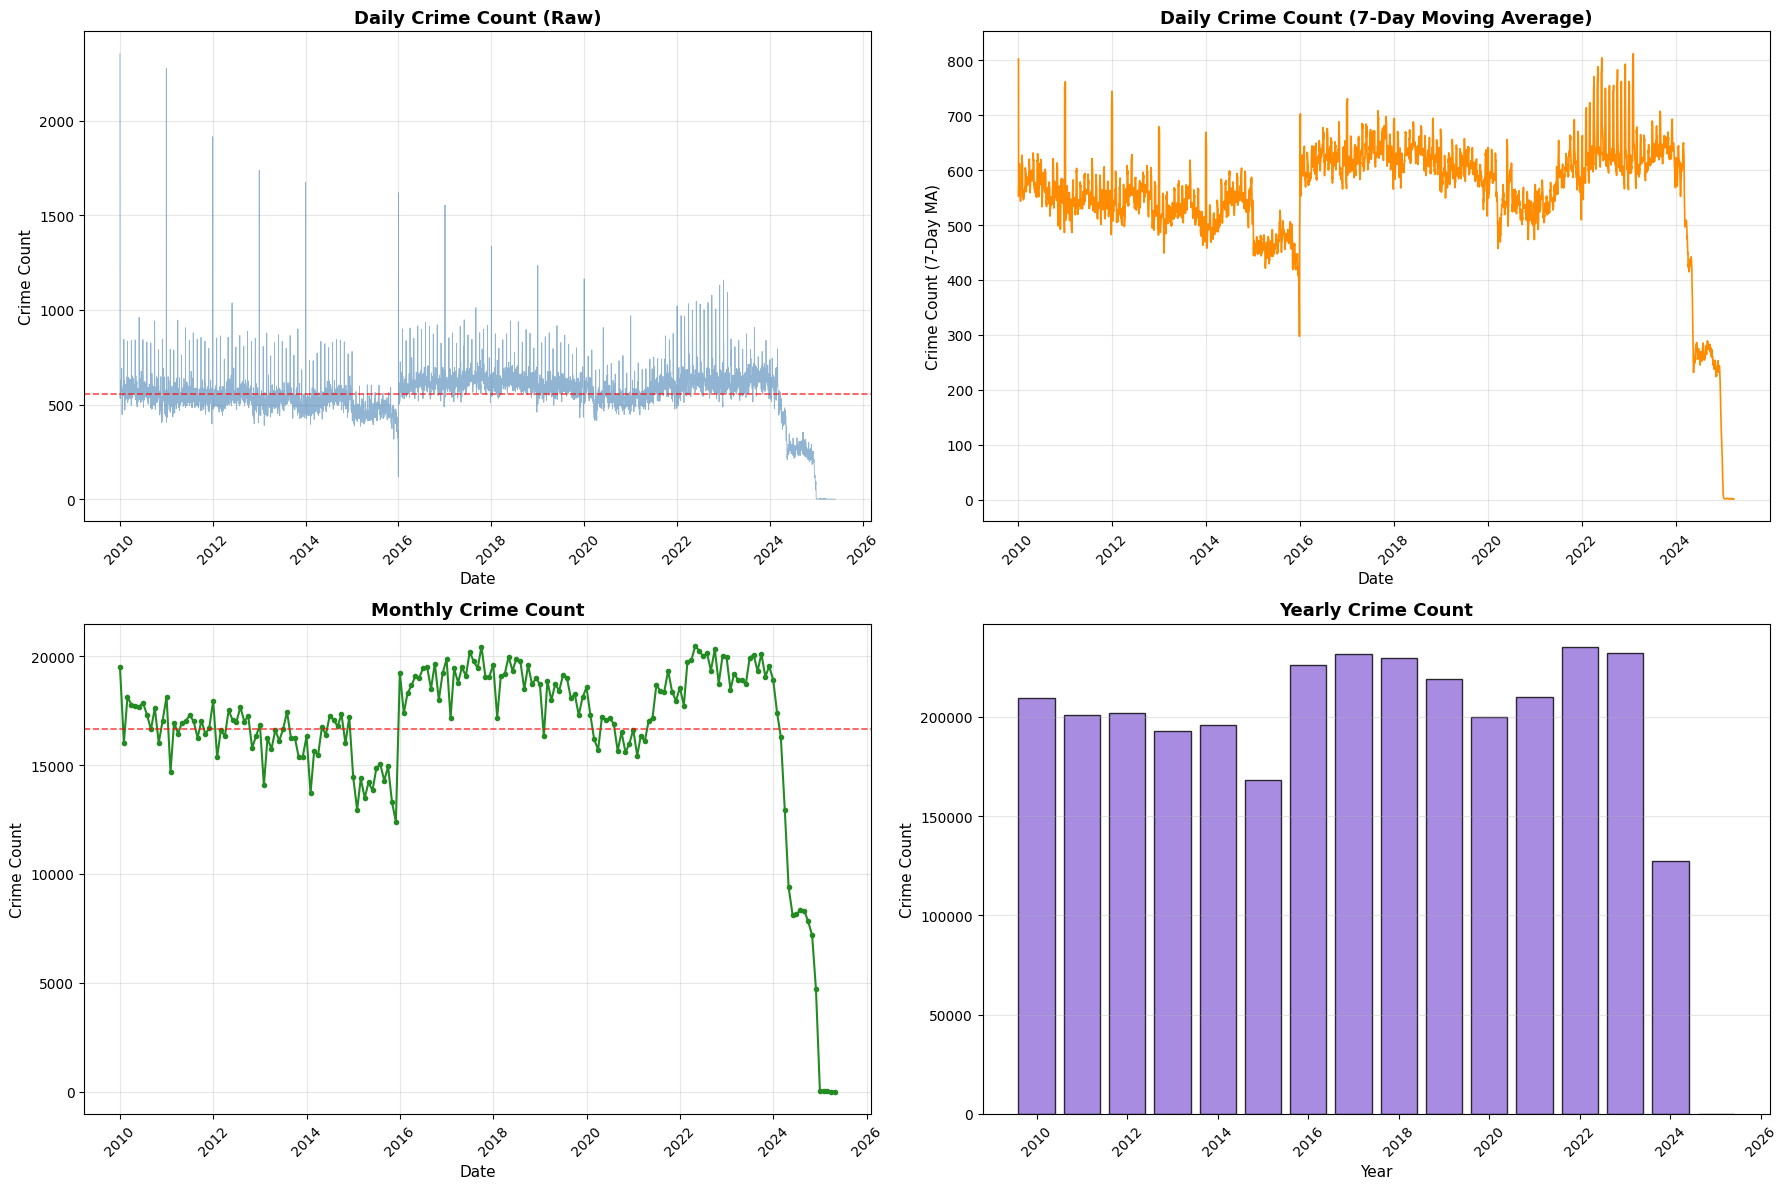


📊 各时间粒度统计:

  • 每日平均: 556.77
  • 每月平均: 16646.06
  • 每年平均: 192470.06

✅ 多粒度时间序列对比图生成完成!


In [62]:
# ============================================================================
# 📈 多种时间粒度的犯罪趋势对比
# ============================================================================

print("\n" + "=" * 80)
print("📊 生成多粒度时间序列对比图...")
print("=" * 80)

# 准备不同时间粒度的数据
daily_crimes = datav13.groupby('DATE OCC').size().reset_index(name='Crime_Count')
monthly_crimes = datav13.groupby(datav13['DATE OCC'].dt.to_period('M')).size().reset_index(name='Crime_Count')
monthly_crimes['DATE OCC'] = monthly_crimes['DATE OCC'].dt.to_timestamp()

# 创建 2x2 子图
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# ========== 左上: 每日犯罪数 (原始数据) ==========
axes[0, 0].plot(daily_crimes['DATE OCC'], daily_crimes['Crime_Count'], 
               color='steelblue', linewidth=0.6, alpha=0.6)
axes[0, 0].axhline(y=daily_crimes['Crime_Count'].mean(), color='red', 
                  linestyle='--', linewidth=1.2, alpha=0.7)
axes[0, 0].set_title('Daily Crime Count (Raw)', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Date', fontsize=11)
axes[0, 0].set_ylabel('Crime Count', fontsize=11)
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axes[0, 0].tick_params(axis='x', rotation=45)

# ========== 右上: 每日犯罪数 (7天移动平均) ==========
daily_crimes['MA7'] = daily_crimes['Crime_Count'].rolling(window=7, center=True).mean()
axes[0, 1].plot(daily_crimes['DATE OCC'], daily_crimes['MA7'], 
               color='darkorange', linewidth=1.2)
axes[0, 1].set_title('Daily Crime Count (7-Day Moving Average)', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('Date', fontsize=11)
axes[0, 1].set_ylabel('Crime Count (7-Day MA)', fontsize=11)
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axes[0, 1].tick_params(axis='x', rotation=45)

# ========== 左下: 每月犯罪数 ==========
axes[1, 0].plot(monthly_crimes['DATE OCC'], monthly_crimes['Crime_Count'], 
               color='forestgreen', linewidth=1.5, marker='o', markersize=3)
axes[1, 0].axhline(y=monthly_crimes['Crime_Count'].mean(), color='red', 
                  linestyle='--', linewidth=1.2, alpha=0.7)
axes[1, 0].set_title('Monthly Crime Count', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('Date', fontsize=11)
axes[1, 0].set_ylabel('Crime Count', fontsize=11)
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axes[1, 0].tick_params(axis='x', rotation=45)

# ========== 右下: 年度犯罪数 ==========
yearly_crimes = datav13.groupby('Year').size().reset_index(name='Crime_Count')
axes[1, 1].bar(yearly_crimes['Year'], yearly_crimes['Crime_Count'], 
              color='mediumpurple', alpha=0.8, edgecolor='black')
axes[1, 1].set_title('Yearly Crime Count', fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('Year', fontsize=11)
axes[1, 1].set_ylabel('Crime Count', fontsize=11)
axes[1, 1].grid(True, alpha=0.3, axis='y')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 打印统计信息
print("\n📊 各时间粒度统计:")
print(f"\n  • 每日平均: {daily_crimes['Crime_Count'].mean():.2f}")
print(f"  • 每月平均: {monthly_crimes['Crime_Count'].mean():.2f}")
print(f"  • 每年平均: {yearly_crimes['Crime_Count'].mean():.2f}")

print("\n" + "=" * 80)
print("✅ 多粒度时间序列对比图生成完成!")
print("=" * 80)


📊 分析星期几对犯罪数量的影响...


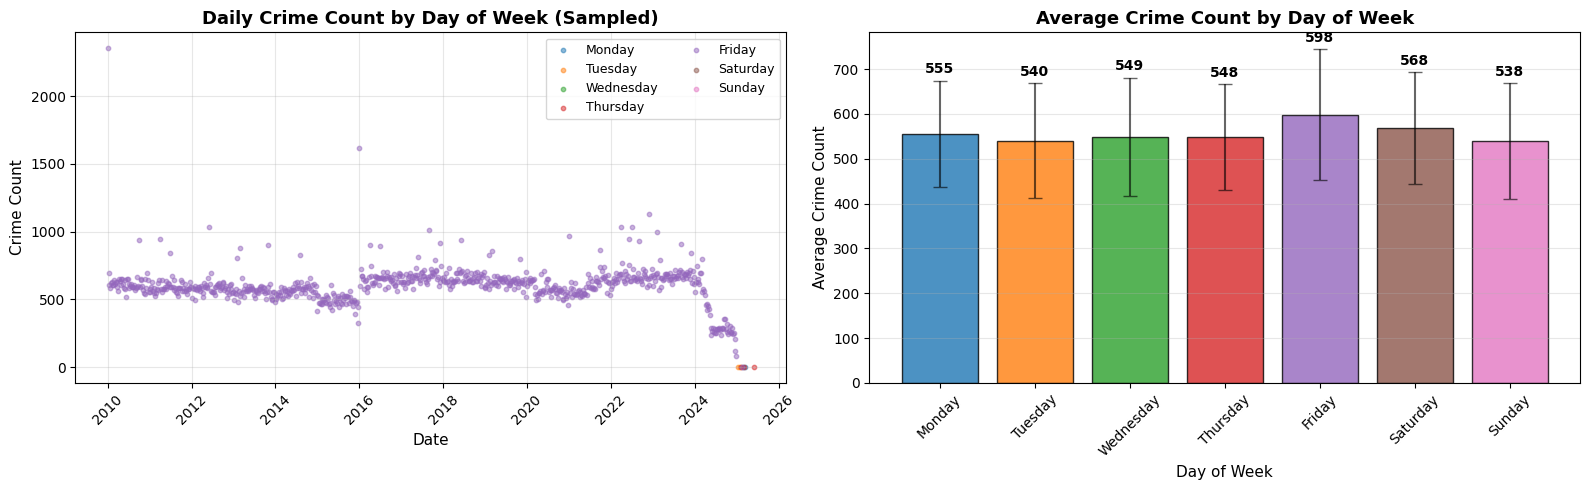


📊 星期几犯罪统计:


,星期,平均犯罪数,标准差
0,Monday,554.822560,118.720918
1,Tuesday,540.334174,127.448982
2,Wednesday,549.112091,131.399447
3,Thursday,548.295311,117.450109
4,Friday,598.426043,146.152727
5,Saturday,568.160510,124.516595
6,Sunday,538.379747,129.324942



✅ 星期几犯罪模式分析完成!


In [63]:
# ============================================================================
# 📊 按星期几的犯罪模式分析 (叠加在日期图上)
# ============================================================================

print("\n" + "=" * 80)
print("📊 分析星期几对犯罪数量的影响...")
print("=" * 80)

# 添加星期几信息到 daily_crimes
daily_crimes_with_dow = daily_crimes.copy()
daily_crimes_with_dow['DayOfWeek'] = daily_crimes_with_dow['DATE OCC'].dt.dayofweek
daily_crimes_with_dow['DayName'] = daily_crimes_with_dow['DATE OCC'].dt.day_name()

# 按星期几统计平均犯罪数
dow_stats = daily_crimes_with_dow.groupby('DayOfWeek')['Crime_Count'].agg(['mean', 'std']).reset_index()
dow_stats['DayName'] = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# 创建图表
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# 左图: 按星期几着色的折线图 (抽样显示,避免过于密集)
sample_data = daily_crimes_with_dow[::7]  # 每7天取一个样本
for dow in range(7):
    dow_data = sample_data[sample_data['DayOfWeek'] == dow]
    axes[0].scatter(dow_data['DATE OCC'], dow_data['Crime_Count'], 
                   s=10, alpha=0.5, label=dow_stats.loc[dow, 'DayName'])

axes[0].set_title('Daily Crime Count by Day of Week (Sampled)', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Date', fontsize=11)
axes[0].set_ylabel('Crime Count', fontsize=11)
axes[0].legend(loc='upper right', fontsize=9, ncol=2)
axes[0].grid(True, alpha=0.3)
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axes[0].tick_params(axis='x', rotation=45)

# 右图: 各星期几的平均犯罪数
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
axes[1].bar(dow_stats['DayName'], dow_stats['mean'], 
           color=colors, alpha=0.8, edgecolor='black')
axes[1].errorbar(dow_stats['DayName'], dow_stats['mean'], yerr=dow_stats['std'], 
                fmt='none', color='black', capsize=5, alpha=0.6)
axes[1].set_title('Average Crime Count by Day of Week', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Day of Week', fontsize=11)
axes[1].set_ylabel('Average Crime Count', fontsize=11)
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].tick_params(axis='x', rotation=45)

# 在柱状图上标注数值
for i, row in dow_stats.iterrows():
    axes[1].text(i, row['mean'] + row['std'] + 10, f"{row['mean']:.0f}", 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# 打印统计信息
print("\n📊 星期几犯罪统计:")
display(dow_stats[['DayName', 'mean', 'std']].rename(columns={
    'DayName': '星期', 'mean': '平均犯罪数', 'std': '标准差'
}))

print("\n" + "=" * 80)
print("✅ 星期几犯罪模式分析完成!")
print("=" * 80)

🔍 分析每月1号犯罪数量异常现象...

📊 每月1号统计:
  • 总共的1号天数: 153,164
  • 1号的犯罪总数: 153,164
  • 1号日均犯罪: 1.00

  • 非1号日均犯罪: 546.98
  • 全部日期日均犯罪: 556.77

📈 各日期(1-31号)的平均犯罪数:


,Day,Total_Crimes,Avg_Per_Occurrence
0,1,153164,830.757548
1,2,103414,560.914844
2,3,102788,557.519436
3,4,98549,534.527210
4,5,100156,543.243536
5,6,97785,530.383294
6,7,97808,530.508046
7,8,97633,529.558850
8,9,96860,525.366118
9,10,101272,549.296691


/var/folders/t_/_rls_mdn6j71jv6pjl69n5680000gn/T/ipykernel_93065/2523746211.py:52: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[0, 1].boxplot(data_for_box, labels=['1号', '其他日期'], patch_artist=True, widths=0.6)
/var/folders/t_/_rls_mdn6j71jv6pjl69n5680000gn/T/ipykernel_93065/2523746211.py:91: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/t_/_rls_mdn6j71jv6pjl69n5680000gn/T/ipykernel_93065/2523746211.py:91: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/t_/_rls_mdn6j71jv6pjl69n5680000gn/T/ipykernel_93065/2523746211.py:91: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/t_/_rls_mdn6j71jv6pjl69n5680000gn/T/ipykernel_93065/2

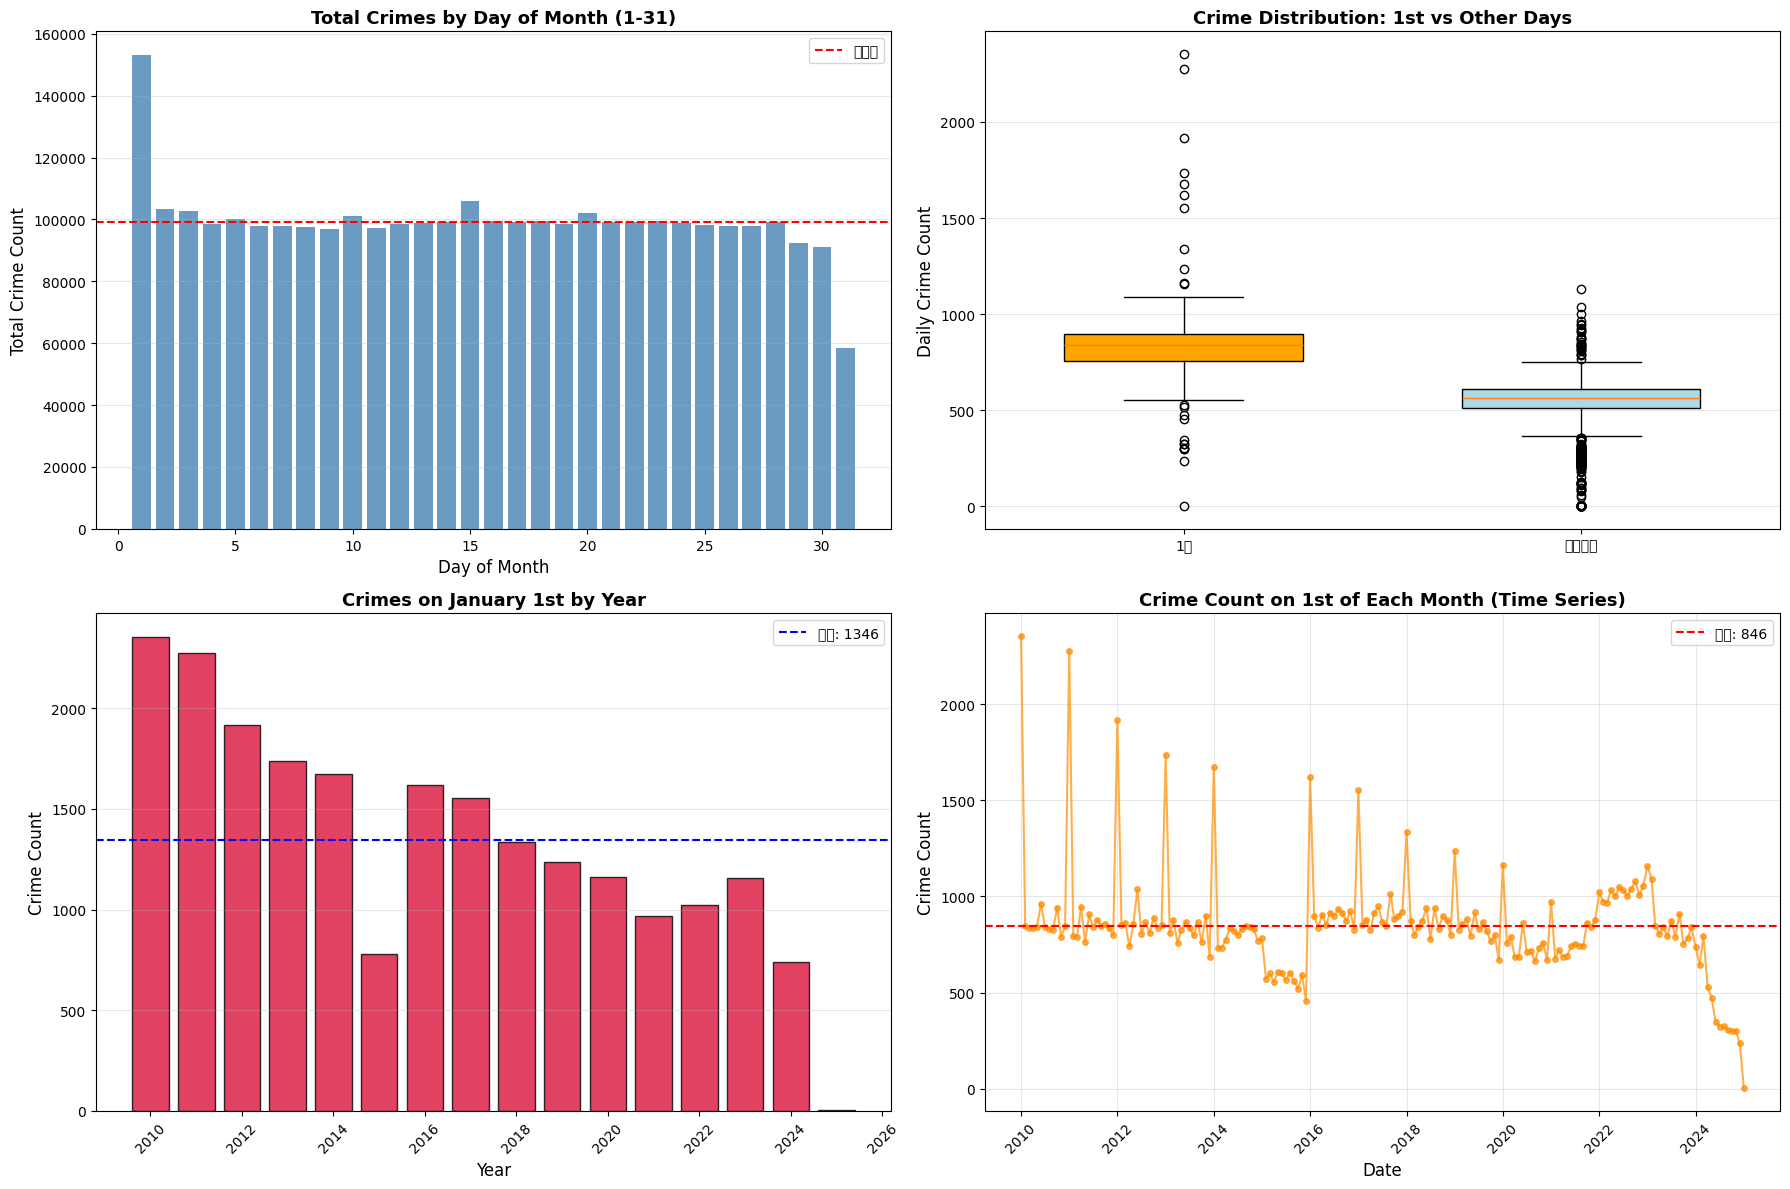



📊 统计对比:


,指标,每月1号,其他日期
0,平均值,846.21,546.98
1,中位数,838,563
2,最大值,"2,354","1,131"
3,最小值,2,1
4,标准差,276.52,108.86



✅ 每月1号异常分析完成!


In [65]:
# ============================================================================
# 🔍 分析每月1号的异常高峰现象
# ============================================================================

print("=" * 80)
print("🔍 分析每月1号犯罪数量异常现象...")
print("=" * 80)

# 1️⃣ 提取每月1号的数据
datav13['Is_First_Day'] = datav13['Day'] == 1
first_day_crimes = datav13[datav13['Is_First_Day']]

print(f"\n📊 每月1号统计:")
print(f"  • 总共的1号天数: {datav13['DATE OCC'].dt.is_month_start.sum():,}")
print(f"  • 1号的犯罪总数: {len(first_day_crimes):,}")
print(f"  • 1号日均犯罪: {len(first_day_crimes) / datav13['DATE OCC'].dt.is_month_start.sum():.2f}")

# 2️⃣ 对比1号与其他日期
non_first_day = datav13[~datav13['Is_First_Day']]
print(f"\n  • 非1号日均犯罪: {len(non_first_day) / len(non_first_day['DATE OCC'].unique()):.2f}")
print(f"  • 全部日期日均犯罪: {len(datav13) / len(datav13['DATE OCC'].unique()):.2f}")

# 3️⃣ 按日期计算每天犯罪数
daily_by_day = datav13.groupby('Day').size().reset_index(name='Total_Crimes')
daily_by_day['Avg_Per_Occurrence'] = daily_by_day['Total_Crimes'] / (len(datav13['DATE OCC'].unique()) / 30)

print(f"\n📈 各日期(1-31号)的平均犯罪数:")
display(daily_by_day.head(10))

# 4️⃣ 可视化对比
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 左上: 按日期分组的总犯罪数
axes[0, 0].bar(daily_by_day['Day'], daily_by_day['Total_Crimes'], color='steelblue', alpha=0.8)
axes[0, 0].axhline(y=daily_by_day['Total_Crimes'].mean(), color='red', linestyle='--', linewidth=1.5, label='平均值')
axes[0, 0].set_xlabel('Day of Month', fontsize=12)
axes[0, 0].set_ylabel('Total Crime Count', fontsize=12)
axes[0, 0].set_title('Total Crimes by Day of Month (1-31)', fontsize=13, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3, axis='y')

# 右上: 每月1号 vs 其他日期的箱线图
daily_crimes_grouped = datav13.groupby('DATE OCC').size().reset_index(name='Crime_Count')
daily_crimes_grouped['Day'] = pd.to_datetime(daily_crimes_grouped['DATE OCC']).dt.day
daily_crimes_grouped['Is_First'] = daily_crimes_grouped['Day'] == 1

data_for_box = [
    daily_crimes_grouped[daily_crimes_grouped['Is_First']]['Crime_Count'],
    daily_crimes_grouped[~daily_crimes_grouped['Is_First']]['Crime_Count']
]

bp = axes[0, 1].boxplot(data_for_box, labels=['1号', '其他日期'], patch_artist=True, widths=0.6)
bp['boxes'][0].set_facecolor('orange')
bp['boxes'][1].set_facecolor('lightblue')
axes[0, 1].set_ylabel('Daily Crime Count', fontsize=12)
axes[0, 1].set_title('Crime Distribution: 1st vs Other Days', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# 左下: 每年1月1日的特殊情况
jan_1_data = datav13[(datav13['Month'] == 1) & (datav13['Day'] == 1)]
jan_1_by_year = jan_1_data.groupby('Year').size().reset_index(name='Crime_Count')

axes[1, 0].bar(jan_1_by_year['Year'], jan_1_by_year['Crime_Count'], 
               color='crimson', alpha=0.8, edgecolor='black')
axes[1, 0].axhline(y=jan_1_by_year['Crime_Count'].mean(), color='blue', 
                   linestyle='--', linewidth=1.5, label=f'平均: {jan_1_by_year["Crime_Count"].mean():.0f}')
axes[1, 0].set_xlabel('Year', fontsize=12)
axes[1, 0].set_ylabel('Crime Count', fontsize=12)
axes[1, 0].set_title('Crimes on January 1st by Year', fontsize=13, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, axis='y')
axes[1, 0].tick_params(axis='x', rotation=45)

# 右下: 每月1号的时间序列
first_days_ts = daily_crimes_grouped[daily_crimes_grouped['Is_First']].copy()
first_days_ts['DATE OCC'] = pd.to_datetime(first_days_ts['DATE OCC'])
first_days_ts = first_days_ts.sort_values('DATE OCC')

axes[1, 1].plot(first_days_ts['DATE OCC'], first_days_ts['Crime_Count'], 
                color='darkorange', linewidth=1.5, marker='o', markersize=4, alpha=0.7)
axes[1, 1].axhline(y=first_days_ts['Crime_Count'].mean(), color='red', 
                   linestyle='--', linewidth=1.5, label=f'平均: {first_days_ts["Crime_Count"].mean():.0f}')
axes[1, 1].set_xlabel('Date', fontsize=12)
axes[1, 1].set_ylabel('Crime Count', fontsize=12)
axes[1, 1].set_title('Crime Count on 1st of Each Month (Time Series)', fontsize=13, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)

# 5️⃣ 统计分析
print(f"\n📊 统计对比:")
first_day_stats = daily_crimes_grouped[daily_crimes_grouped['Is_First']]['Crime_Count']
other_day_stats = daily_crimes_grouped[~daily_crimes_grouped['Is_First']]['Crime_Count']

comparison_df = pd.DataFrame({
    '指标': ['平均值', '中位数', '最大值', '最小值', '标准差'],
    '每月1号': [
        f"{first_day_stats.mean():.2f}",
        f"{first_day_stats.median():.0f}",
        f"{first_day_stats.max():,}",
        f"{first_day_stats.min():,}",
        f"{first_day_stats.std():.2f}"
    ],
    '其他日期': [
        f"{other_day_stats.mean():.2f}",
        f"{other_day_stats.median():.0f}",
        f"{other_day_stats.max():,}",
        f"{other_day_stats.min():,}",
        f"{other_day_stats.std():.2f}"
    ]
})

display(comparison_df)

print("\n" + "=" * 80)
print("✅ 每月1号异常分析完成!")
print("=" * 80)

In [66]:
# ============================================================================
# 🤔 可能的原因分析
# ============================================================================

print("\n" + "=" * 80)
print("🤔 每月1号犯罪数量异常高的可能原因:")
print("=" * 80)

print("""
可能的解释:

1️⃣ **数据录入问题** (最可能):
   • 当案件发生日期不确定时,可能默认填写为每月1号
   • 历史案件补录时,日期信息缺失导致使用1号作为默认值
   • 数据迁移或系统升级时的默认日期填充

2️⃣ **报案延迟的统计偏差**:
   • 跨月案件可能被记录为新月的第一天
   • 周末或节假日的案件可能延迟到下月1号处理

3️⃣ **真实的社会现象** (较不可能):
   • 月初发薪日相关的犯罪增加
   • 新年庆祝活动导致1月1日犯罪增多
   
建议:
   ✅ 检查这些"1号"案件的 Report_Delay_Days 分布
   ✅ 查看这些案件的其他字段完整性
   ✅ 考虑在分析时过滤或特殊处理这些数据点
""")

# 验证: 检查1号案件的报案延迟
first_day_delay = first_day_crimes['Report_Delay_Days'].describe()
other_day_delay = non_first_day['Report_Delay_Days'].describe()

print("\n📈 报案延迟天数对比:")
delay_comparison = pd.DataFrame({
    '统计量': ['平均值', '中位数', '25%分位', '75%分位', '最大值'],
    '每月1号': [
        f"{first_day_delay['mean']:.2f}",
        f"{first_day_delay['50%']:.0f}",
        f"{first_day_delay['25%']:.0f}",
        f"{first_day_delay['75%']:.0f}",
        f"{first_day_delay['max']:.0f}"
    ],
    '其他日期': [
        f"{other_day_delay['mean']:.2f}",
        f"{other_day_delay['50%']:.0f}",
        f"{other_day_delay['25%']:.0f}",
        f"{other_day_delay['75%']:.0f}",
        f"{other_day_delay['max']:.0f}"
    ]
})

display(delay_comparison)

print("\n💡 如果1号的报案延迟明显更高,则支持'数据录入问题'的假设")
print("=" * 80)


🤔 每月1号犯罪数量异常高的可能原因:

可能的解释:

1️⃣ **数据录入问题** (最可能):
   • 当案件发生日期不确定时,可能默认填写为每月1号
   • 历史案件补录时,日期信息缺失导致使用1号作为默认值
   • 数据迁移或系统升级时的默认日期填充

2️⃣ **报案延迟的统计偏差**:
   • 跨月案件可能被记录为新月的第一天
   • 周末或节假日的案件可能延迟到下月1号处理

3️⃣ **真实的社会现象** (较不可能):
   • 月初发薪日相关的犯罪增加
   • 新年庆祝活动导致1月1日犯罪增多

建议:
   ✅ 检查这些"1号"案件的 Report_Delay_Days 分布
   ✅ 查看这些案件的其他字段完整性
   ✅ 考虑在分析时过滤或特殊处理这些数据点


📈 报案延迟天数对比:


,统计量,每月1号,其他日期
0,平均值,168.20,13.35
1,中位数,2,1
2,25%分位,0,0
3,75%分位,73,2
4,最大值,5407,5284



💡 如果1号的报案延迟明显更高,则支持'数据录入问题'的假设


🔥 生成警察局 × 年份犯罪数量热力图...

📊 数据维度:
  • 警察局数量: 21
  • 年份范围: 2010 - 2025
  • 总犯罪数: 3,079,521


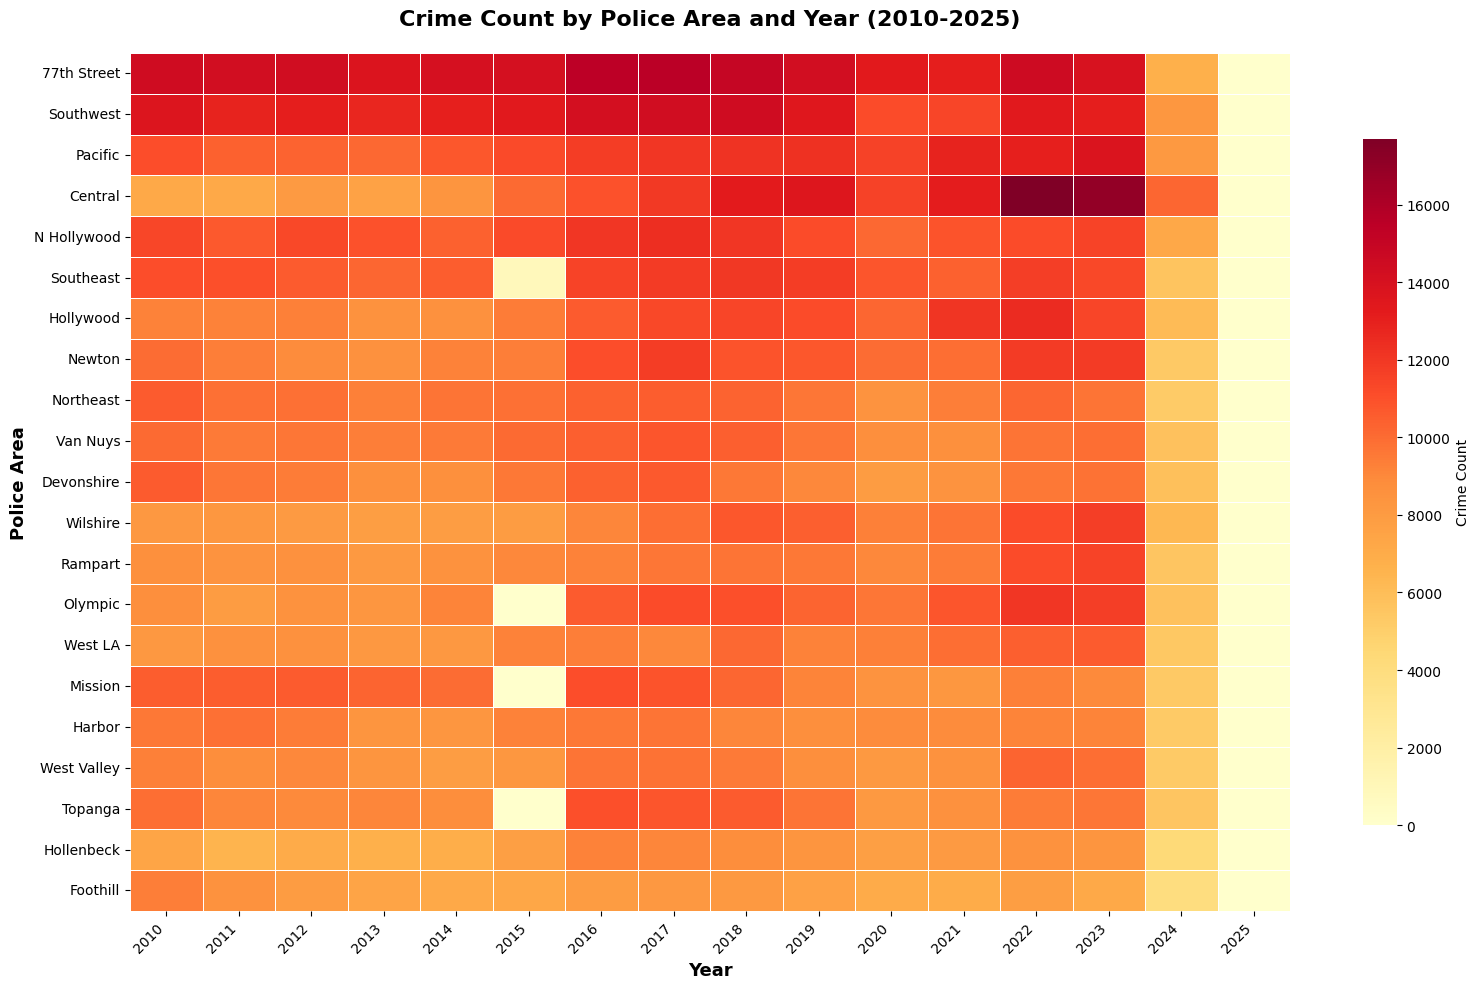


📈 各警察局犯罪总数排名 (2010-2025):


,Rank,Police Area,Total Crimes
0,1,77th Street,"206,995"
1,2,Southwest,"192,737"
2,3,Pacific,"171,753"
3,4,Central,"167,845"
4,5,N Hollywood,"164,821"
5,6,Southeast,"151,504"
6,7,Hollywood,"151,350"
7,8,Newton,"149,101"
8,9,Northeast,"143,104"
9,10,Van Nuys,"142,508"



✅ 热力图生成完成!


In [67]:
# ============================================================================
# 🔥 每个警察局每年犯罪数量热力图
# ============================================================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("=" * 80)
print("🔥 生成警察局 × 年份犯罪数量热力图...")
print("=" * 80)

# 1️⃣ 准备数据: 按 AREA NAME 和 Year 分组统计
heatmap_data = datav13.groupby(['AREA NAME', 'Year']).size().reset_index(name='Crime_Count')

# 2️⃣ 透视表: 行=警察局, 列=年份, 值=犯罪数
pivot_table = heatmap_data.pivot(index='AREA NAME', columns='Year', values='Crime_Count')

# 填充缺失值为 0 (某些警察局某年可能没有数据)
pivot_table = pivot_table.fillna(0)

# 3️⃣ 按总犯罪数排序 (可选: 让热力图更有规律)
pivot_table['Total'] = pivot_table.sum(axis=1)
pivot_table = pivot_table.sort_values('Total', ascending=False).drop('Total', axis=1)

print(f"\n📊 数据维度:")
print(f"  • 警察局数量: {len(pivot_table)}")
print(f"  • 年份范围: {pivot_table.columns.min()} - {pivot_table.columns.max()}")
print(f"  • 总犯罪数: {pivot_table.sum().sum():,.0f}")

# 4️⃣ 创建热力图
fig, ax = plt.subplots(figsize=(16, 10))

# 绘制热力图
sns.heatmap(
    pivot_table,
    annot=False,          # 不显示数字 (太密集)
    fmt='.0f',
    cmap='YlOrRd',        # 黄-橙-红配色
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'label': 'Crime Count', 'shrink': 0.8},
    ax=ax
)

# 设置标题和标签
ax.set_title('Crime Count by Police Area and Year (2010-2025)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=13, fontweight='bold')
ax.set_ylabel('Police Area', fontsize=13, fontweight='bold')

# 旋转 x 轴标签
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

# 5️⃣ 打印统计摘要
print("\n" + "=" * 80)
print("📈 各警察局犯罪总数排名 (2010-2025):")
print("=" * 80)

area_totals = pivot_table.sum(axis=1).sort_values(ascending=False).reset_index()
area_totals.columns = ['Police Area', 'Total Crimes']
area_totals['Rank'] = range(1, len(area_totals) + 1)
area_totals = area_totals[['Rank', 'Police Area', 'Total Crimes']]
area_totals['Total Crimes'] = area_totals['Total Crimes'].apply(lambda x: f"{int(x):,}")

display(area_totals)

print("\n" + "=" * 80)
print("✅ 热力图生成完成!")
print("=" * 80)

🔥 生成警察局 × 月份犯罪数量热力图...

📊 数据维度:
  • 警察局数量: 21
  • 月份范围: 1 - 12
  • 总犯罪数: 3,079,521


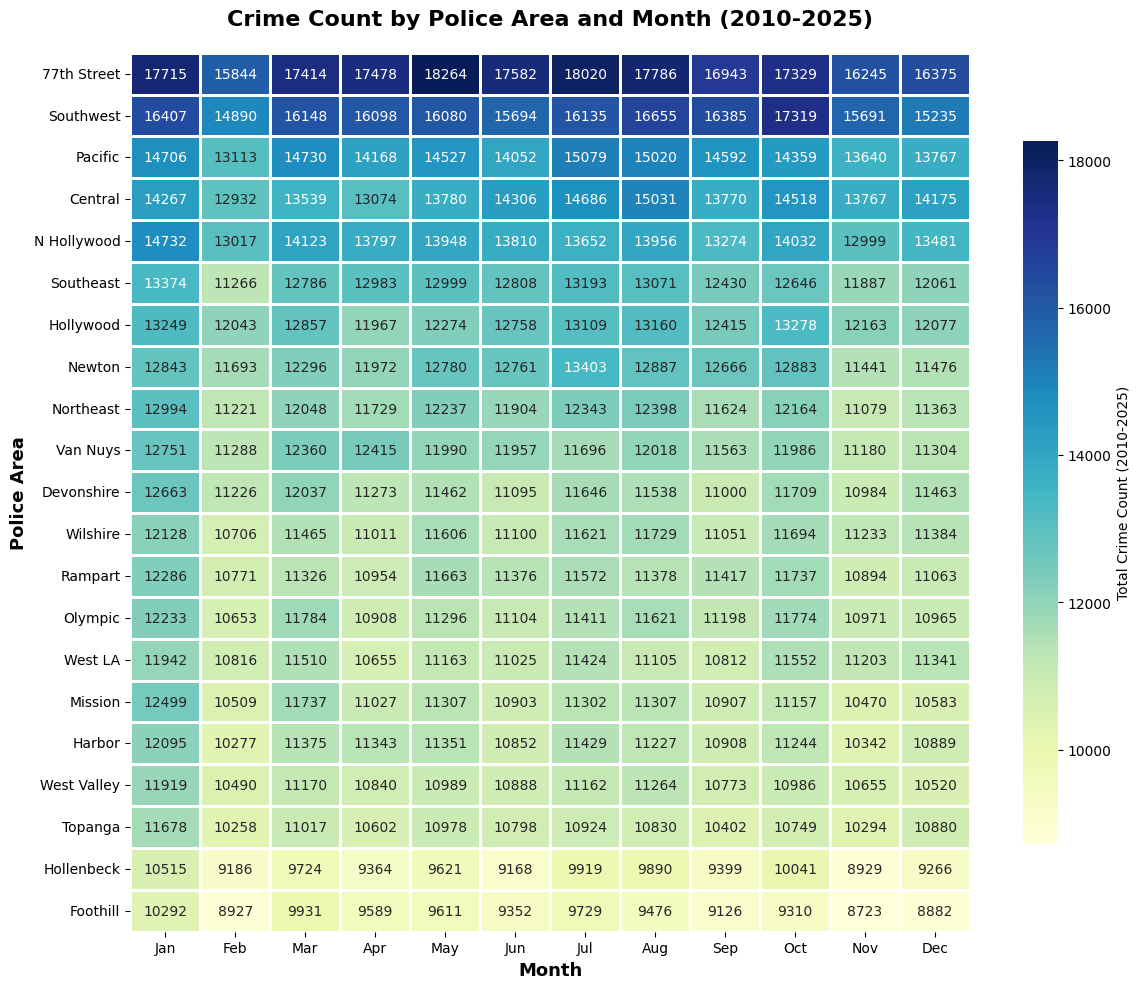


📈 各月份犯罪总数 (2010-2025):


,Month,Month Name,Total Crimes
0,1,Jan,"273,288"
1,2,Feb,"241,126"
2,3,Mar,"261,377"
3,4,Apr,"253,247"
4,5,May,"259,926"
5,6,Jun,"255,293"
6,7,Jul,"263,455"
7,8,Aug,"263,347"
8,9,Sep,"252,655"
9,10,Oct,"262,467"



📊 各警察局犯罪总数排名 (按月份汇总):


,Rank,Police Area,Total Crimes
0,1,77th Street,"206,995"
1,2,Southwest,"192,737"
2,3,Pacific,"171,753"
3,4,Central,"167,845"
4,5,N Hollywood,"164,821"
5,6,Southeast,"151,504"
6,7,Hollywood,"151,350"
7,8,Newton,"149,101"
8,9,Northeast,"143,104"
9,10,Van Nuys,"142,508"



✅ 月度热力图生成完成!


In [68]:
# ============================================================================
# 🔥 每个警察局 × 月份犯罪数量热力图 (跨所有年份统计)
# ============================================================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("=" * 80)
print("🔥 生成警察局 × 月份犯罪数量热力图...")
print("=" * 80)

# 1️⃣ 准备数据: 按 AREA NAME 和 Month 分组统计
heatmap_data_month = datav13.groupby(['AREA NAME', 'Month']).size().reset_index(name='Crime_Count')

# 2️⃣ 透视表: 行=警察局, 列=月份, 值=犯罪数
pivot_table_month = heatmap_data_month.pivot(index='AREA NAME', columns='Month', values='Crime_Count')

# 填充缺失值为 0
pivot_table_month = pivot_table_month.fillna(0)

# 3️⃣ 按总犯罪数排序
pivot_table_month['Total'] = pivot_table_month.sum(axis=1)
pivot_table_month = pivot_table_month.sort_values('Total', ascending=False).drop('Total', axis=1)

print(f"\n📊 数据维度:")
print(f"  • 警察局数量: {len(pivot_table_month)}")
print(f"  • 月份范围: {int(pivot_table_month.columns.min())} - {int(pivot_table_month.columns.max())}")
print(f"  • 总犯罪数: {pivot_table_month.sum().sum():,.0f}")

# 4️⃣ 创建热力图
fig, ax = plt.subplots(figsize=(12, 10))

# 绘制热力图
sns.heatmap(
    pivot_table_month,
    annot=True,           # 显示数字 (月份少,可以显示)
    fmt='.0f',
    cmap='YlGnBu',        # 黄-绿-蓝配色
    linewidths=0.8,
    linecolor='white',
    cbar_kws={'label': 'Total Crime Count (2010-2025)', 'shrink': 0.8},
    ax=ax
)

# 设置标题和标签
ax.set_title('Crime Count by Police Area and Month (2010-2025)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Month', fontsize=13, fontweight='bold')
ax.set_ylabel('Police Area', fontsize=13, fontweight='bold')

# 设置 x 轴为月份名称
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax.set_xticklabels(month_names, rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

# 5️⃣ 打印月度统计摘要
print("\n" + "=" * 80)
print("📈 各月份犯罪总数 (2010-2025):")
print("=" * 80)

monthly_totals = pivot_table_month.sum(axis=0).reset_index()
monthly_totals.columns = ['Month', 'Total Crimes']
monthly_totals['Month Name'] = month_names
monthly_totals['Total Crimes'] = monthly_totals['Total Crimes'].apply(lambda x: f"{int(x):,}")
monthly_totals = monthly_totals[['Month', 'Month Name', 'Total Crimes']]

display(monthly_totals)

# 6️⃣ 各警察局月度犯罪排名
print("\n" + "=" * 80)
print("📊 各警察局犯罪总数排名 (按月份汇总):")
print("=" * 80)

area_monthly_totals = pivot_table_month.sum(axis=1).sort_values(ascending=False).reset_index()
area_monthly_totals.columns = ['Police Area', 'Total Crimes']
area_monthly_totals['Rank'] = range(1, len(area_monthly_totals) + 1)
area_monthly_totals = area_monthly_totals[['Rank', 'Police Area', 'Total Crimes']]
area_monthly_totals['Total Crimes'] = area_monthly_totals['Total Crimes'].apply(lambda x: f"{int(x):,}")

display(area_monthly_totals)

print("\n" + "=" * 80)
print("✅ 月度热力图生成完成!")
print("=" * 80)

🔥 生成警察局 × 年-月犯罪数量热力图...

📊 数据维度:
  • 警察局数量: 21
  • 时间跨度: 2010-01 至 2025-05
  • 总月份数: 185
  • 总犯罪数: 3,079,521


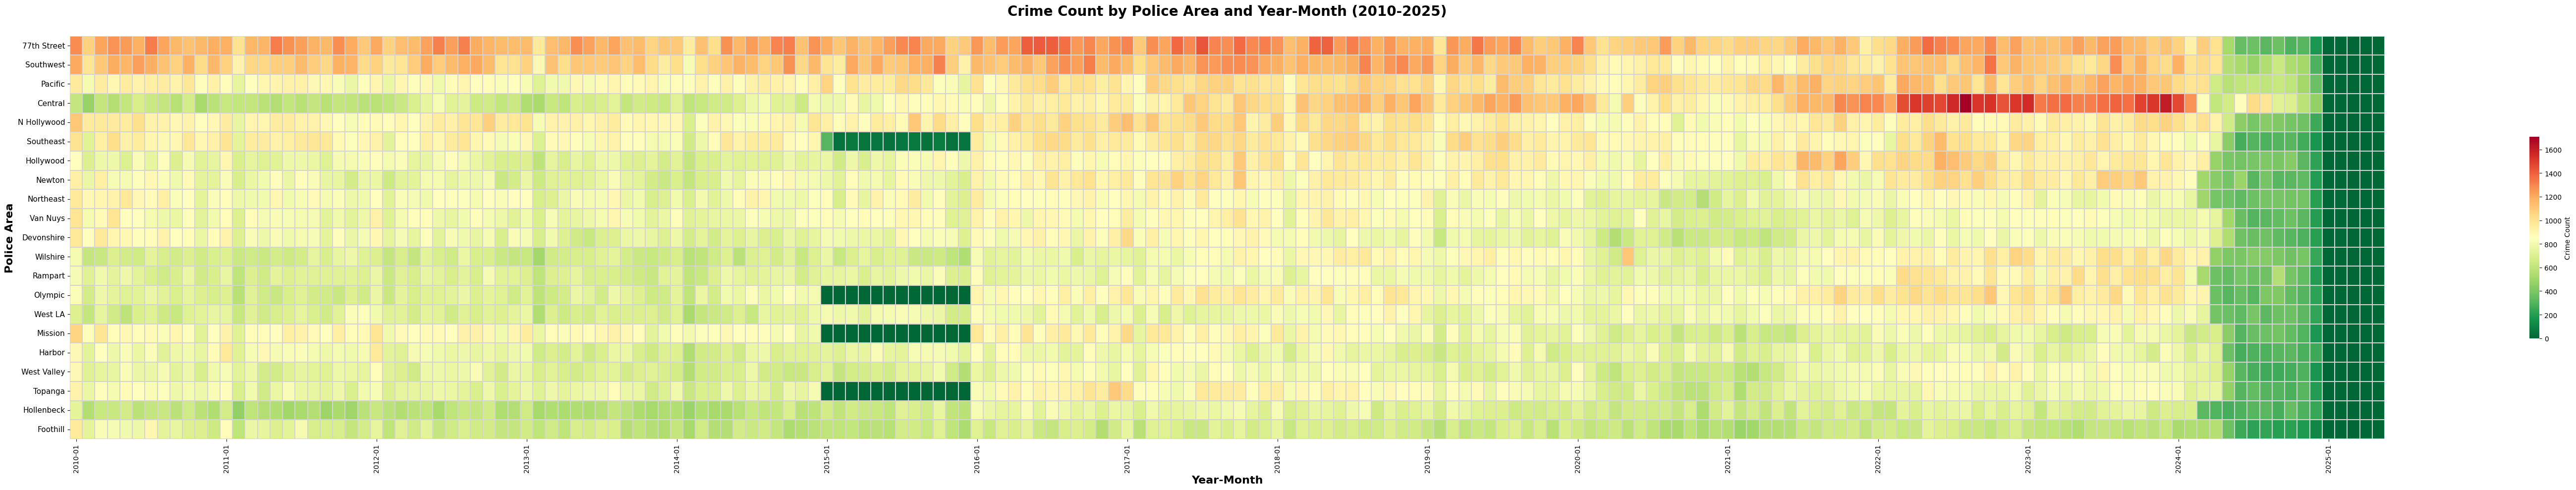


✅ 年-月热力图生成完成!

📈 各警察局犯罪总数排名 (2010-2025):


,Rank,Police Area,Total Crimes
0,1,77th Street,"206,995"
1,2,Southwest,"192,737"
2,3,Pacific,"171,753"
3,4,Central,"167,845"
4,5,N Hollywood,"164,821"
5,6,Southeast,"151,504"
6,7,Hollywood,"151,350"
7,8,Newton,"149,101"
8,9,Northeast,"143,104"
9,10,Van Nuys,"142,508"



📅 犯罪数最高的前10个年-月:


,Year-Month,Total Crimes
0,2022-05,"20,461"
1,2017-10,"20,442"
2,2022-10,"20,324"
3,2022-06,"20,252"
4,2017-07,"20,201"
5,2022-08,"20,129"
6,2023-10,"20,106"
7,2023-08,"20,067"
8,2022-12,"20,019"
9,2022-07,"19,997"



📅 犯罪数最低的前10个年-月:


,Year-Month,Total Crimes
0,2025-04,1
1,2025-05,2
2,2025-03,24
3,2025-01,26
4,2025-02,44
5,2024-12,"4,697"
6,2024-11,"7,178"
7,2024-10,"7,817"
8,2024-06,"8,124"
9,2024-07,"8,162"


In [69]:
# ============================================================================
# 🔥 每个警察局 × 年-月的犯罪数量热力图 (Year-Month × Police Area)
# ============================================================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

print("=" * 80)
print("🔥 生成警察局 × 年-月犯罪数量热力图...")
print("=" * 80)

# 1️⃣ 创建年-月组合列 (如 "2010-01", "2010-02")
datav13['Year_Month'] = datav13['DATE OCC'].dt.to_period('M').astype(str)

# 2️⃣ 按 AREA NAME 和 Year_Month 分组统计
heatmap_data_ym = datav13.groupby(['AREA NAME', 'Year_Month']).size().reset_index(name='Crime_Count')

# 3️⃣ 透视表: 行=警察局, 列=年-月, 值=犯罪数
pivot_table_ym = heatmap_data_ym.pivot(index='AREA NAME', columns='Year_Month', values='Crime_Count')

# 填充缺失值为 0
pivot_table_ym = pivot_table_ym.fillna(0)

# 4️⃣ 按总犯罪数排序警察局
pivot_table_ym['Total'] = pivot_table_ym.sum(axis=1)
pivot_table_ym = pivot_table_ym.sort_values('Total', ascending=False).drop('Total', axis=1)

print(f"\n📊 数据维度:")
print(f"  • 警察局数量: {len(pivot_table_ym)}")
print(f"  • 时间跨度: {pivot_table_ym.columns.min()} 至 {pivot_table_ym.columns.max()}")
print(f"  • 总月份数: {len(pivot_table_ym.columns)}")
print(f"  • 总犯罪数: {pivot_table_ym.sum().sum():,.0f}")

# 5️⃣ 创建超宽热力图
fig, ax = plt.subplots(figsize=(60, 10))  # 超宽画布,适应 ~180 个月

# 绘制热力图
sns.heatmap(
    pivot_table_ym,
    annot=False,          # 月份太多,不显示数字
    fmt='.0f',
    cmap='RdYlGn_r',      # 红(高)-黄-绿(低)配色
    linewidths=0.1,
    linecolor='lightgray',
    cbar_kws={'label': 'Crime Count', 'shrink': 0.5},
    ax=ax
)

# 设置标题和标签
ax.set_title('Crime Count by Police Area and Year-Month (2010-2025)', 
             fontsize=20, fontweight='bold', pad=30)
ax.set_xlabel('Year-Month', fontsize=16, fontweight='bold')
ax.set_ylabel('Police Area', fontsize=16, fontweight='bold')

# 优化 x 轴显示: 每12个月显示一次年份
xtick_positions = range(0, len(pivot_table_ym.columns), 12)  # 每12个月
xtick_labels = [pivot_table_ym.columns[i] for i in xtick_positions]
ax.set_xticks([i + 0.5 for i in xtick_positions])
ax.set_xticklabels(xtick_labels, rotation=90, ha='center', fontsize=10)

# y 轴标签
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=11)

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("✅ 年-月热力图生成完成!")
print("=" * 80)

# ============================================================================
# 📊 统计摘要
# ============================================================================

# 6️⃣ 各警察局的年-月犯罪趋势统计
print("\n📈 各警察局犯罪总数排名 (2010-2025):")
area_totals_ym = pivot_table_ym.sum(axis=1).sort_values(ascending=False).reset_index()
area_totals_ym.columns = ['Police Area', 'Total Crimes']
area_totals_ym['Rank'] = range(1, len(area_totals_ym) + 1)
area_totals_ym = area_totals_ym[['Rank', 'Police Area', 'Total Crimes']]
area_totals_ym['Total Crimes'] = area_totals_ym['Total Crimes'].apply(lambda x: f"{int(x):,}")

display(area_totals_ym)

# 7️⃣ 找出犯罪数最高的年-月
print("\n" + "=" * 80)
print("📅 犯罪数最高的前10个年-月:")
print("=" * 80)

monthly_totals_ym = pivot_table_ym.sum(axis=0).sort_values(ascending=False).head(10).reset_index()
monthly_totals_ym.columns = ['Year-Month', 'Total Crimes']
monthly_totals_ym['Total Crimes'] = monthly_totals_ym['Total Crimes'].apply(lambda x: f"{int(x):,}")

display(monthly_totals_ym)

# 8️⃣ 找出犯罪数最低的年-月
print("\n📅 犯罪数最低的前10个年-月:")
monthly_totals_ym_low = pivot_table_ym.sum(axis=0).sort_values(ascending=True).head(10).reset_index()
monthly_totals_ym_low.columns = ['Year-Month', 'Total Crimes']
monthly_totals_ym_low['Total Crimes'] = monthly_totals_ym_low['Total Crimes'].apply(lambda x: f"{int(x):,}")

display(monthly_totals_ym_low)

print("\n" + "=" * 80)